In [5]:
import pandas as pd
import numpy as np
import seaborn as sns
import ast
import matplotlib
import matplotlib.pyplot as plt

In [83]:
wine_area = pd.read_csv('wine_area_province.csv',encoding = 'cp949')
wine_dictionary = pd.read_csv('wine_data_dictionary.csv',encoding = 'cp949')
wine_sales = pd.read_csv('wine_data_sales.csv',encoding = 'cp949')
wine_frequency = pd.read_csv('wine_frequency.csv',encoding = 'cp949')
wine_preference = pd.read_csv('wine_preference.csv',encoding = 'cp949')
wine_quality_red = pd.read_csv('wine_quality_red.csv',encoding = 'cp949')
wine_quality_white = pd.read_csv('wine_quality_white.csv',encoding = 'cp949')
wine_side = pd.read_csv('wine_side.csv',encoding = 'cp949')
order_train = pd.read_csv('eShopping_order_products__train.csv',encoding = 'cp949')
orders = pd.read_csv('eShopping_orders.csv',encoding = 'cp949')
wine_area_grade = pd.read_csv('wine_area_grade.csv',encoding = 'cp949')
wine_data_group = pd.read_csv('wine_raw_data_group.csv',encoding = 'cp949')

In [35]:
wines = ['A','B','C','D','E','F','G','H']
sides = ['Camenbert','Gorgonzola','Brie','Roquefort','Roquefort','Camenbert','Valencay','Camenbert']
for i in range(8):
    wine_side[(wine_side['side'].isnull()) & (wine_side['choice1']==wines[i])]=wine_side[(wine_side['side'].isnull()) & (wine_side['choice1']==wines[i])].fillna(sides[i])
    
#wine rate가 1을 넘어가는 데이터들 삭제
wine_frequency['rate'] = wine_frequency['wineFrequency']/wine_frequency['frequency']
wine_frequency = wine_frequency.drop(wine_frequency[wine_frequency['rate']>1].index

wine_frequency = wine_frequency.reset_index(drop=True)

### 전처리

### 결측치들을 모두 미상으로 모은다.

In [ ]:
wine_preference.loc[wine_preference['gender'].isnull(),'gender']='미상'
wine_preference.loc[wine_preference['gender']=='UNKNOW','gender']='미상'
wine_preference.loc[wine_preference['marital'].isnull(),'marital']='미상'
wine_preference.loc[wine_preference['marital']=='UNKNOWN','marital']='미상'
wine_preference.loc[wine_preference['province'].isnull(),'province']='미상'

### seq 결측치 채우기

In [ ]:
wine_preference.loc[wine_preference['seq'].isnull(),'seq']=wine_preference[wine_preference['seq'].isnull()].index+1

### 도시에 따라 급지 column을 추가

In [ ]:
import ast

wine_area_grade['Cities'] = wine_area_grade['Cities'].apply(ast.literal_eval)

result = []
for i in range(10000):
    if wine_preference['city'][i] in wine_area_grade['Cities'][0]:
        result.append('1급지')
    elif wine_preference['city'][i] in wine_area_grade['Cities'][1]:
        result.append('2급지')
    elif wine_preference['city'][i] in wine_area_grade['Cities'][2]:
        result.append('3급지')
    elif wine_preference['city'][i] in wine_area_grade['Cities'][3]:
        result.append('4급지')
    else:
        result.append('5급지')

wine_preference['area_grade'] = result

### 결측치 제거

In [36]:
gender_ind=wine_preference[(wine_preference['gender']=='미상')].index
age_ind=wine_preference[(wine_preference['age']=='미상')].index
job_ind=wine_preference[(wine_preference['job']=='미상')].index
marital_ind=wine_preference[(wine_preference['marital']=='미상')].index
province_ind=wine_preference[(wine_preference['province']=='미상')].index

wine_preference=wine_preference.drop(gender_ind)
wine_preference=wine_preference.drop(age_ind)
wine_preference=wine_preference.drop(job_ind)
wine_preference=wine_preference.drop(marital_ind)
wine_preference=wine_preference.drop(province_ind)

### 이상치 제거

In [37]:
# wine_quality_white 이상치 제거
df_white = wine_quality_white[(wine_quality_white['fixed acidity']<=11)&(wine_quality_white['volatile acidity']<=1)&(wine_quality_white['citric acid']<=1)&(wine_quality_white["chlorides"]<=0.25)&(wine_quality_white['free sulfur dioxide']<=210)&(wine_quality_white['pH']>=2.8)&(wine_quality_white['sulphates']<=1)]
df_white['color']='w'

# wine_quality_red 이상치 제거
df_strange = [142, 144, 243, 244,258, 374, 396, 400, 442, 480, 544, 554, 555, 557, 588, 652,821, 1079, 1081, 1114, 1126, 1228, 1235, 1244, 1269, 1270, 1299, 1316, 1321, 1434, 1435, 1474, 1475, 1476, 1477, 1574]
df_red = wine_quality_red.drop(df_strange)
df_red['color']='r'

#red, white 와인 합침 + index reset
df_wines_quality = pd.concat([df_red,df_white],axis = 0, ignore_index = True)
df_wines_quality.head()

/home/pirl/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,color
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,r
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,r
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,r
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,r
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,r


### 사는도시에 따른 지역등급 추가

In [ ]:
result = []
for i in range(139331):
    if wine_sales['city'][i] in wine_area_grade['Cities'][0]:
        result.append('1급지')
    elif wine_sales['city'][i] in wine_area_grade['Cities'][1]:
        result.append('2급지')
    elif wine_sales['city'][i] in wine_area_grade['Cities'][2]:
        result.append('3급지')
    elif wine_sales['city'][i] in wine_area_grade['Cities'][3]:
        result.append('4급지')
    else:
        result.append('5급지')

wine_sales['area_grade'] = result

### 결측치 제거

In [38]:
wine_sales=wine_sales[wine_sales['age']!='미상']
wine_sales=wine_sales[wine_sales['gender']!='UNKNOW']
wine_sales=wine_sales[wine_sales['marital']!='UNKNOWN']
wine_sales=wine_sales[wine_sales['job']!='미상']

wine_sales = wine_sales.reset_index(drop=True)

### seq기준으로 합치기 (preference,side,frequency)

#### 이 데이터셋 정보 : 시음회에 참여한 만명을 대상으로 나이,성별,직업,결혼유무,사는곳 , 처음 선택한 포도주, 안주를 먹고난후 선택한 포도주의 정보가 있는 데이터 
1. 먹은 안주에 따른 와인을 추천해주는 모델 
2. 고객군 별 와인을 추천해주는 모델을 만들예정

In [158]:
wine_preference = pd.read_csv('wine_preference.csv',encoding = 'cp949')
wine_side = pd.read_csv('wine_side.csv',encoding = 'cp949')
wine_frequency = pd.read_csv('wine_frequency.csv',encoding = 'cp949')

#### 기존 wine_preference의 seq의 값에 nan값이 있어서 나중에 합칠때 20개의 row데이터가 사라지므로 제일 먼저 채워준다.

In [71]:
wine_preference.head()

,seq,gender,age,job,marital,province,city,choice
0,1.0,MALE,40대,자영업,MARREID,부산시,기장군,E
1,2.0,FEMALE,20대,자영업,SINGLE,충청도,천안시,E
2,3.0,MALE,40대,임시직,MARREID,서울시,강남구,C
3,4.0,FEMALE,50대,벤처직원,MARREID,경상도,거제시,D
4,5.0,MALE,30대,교수,MARREID,경기도,포천시,E


In [159]:
wine_preference['seq'] = [i for i in range(1,10001)]

In [160]:
# seq의 nan값이 채워진것을 확인
wine_preference.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 8 columns):
seq         10000 non-null int64
gender      9986 non-null object
age         10000 non-null object
job         10000 non-null object
marital     9970 non-null object
province    9970 non-null object
city        10000 non-null object
choice      10000 non-null object
dtypes: int64(1), object(7)
memory usage: 625.1+ KB


In [161]:
test = pd.merge(wine_side,wine_preference,on = 'seq')

wine_preference = pd.merge(test,wine_frequency,on = 'seq')

test = test[['seq', 'gender', 'age', 'job', 'marital', 'province',
       'city', 'side', 'choice', 'choice1']]

wine_preference = pd.merge(test,wine_frequency,on = 'seq')

wine_preference['rate'] = wine_preference['wineFrequency']/wine_preference['frequency']

In [166]:
wine_preference.head()

,seq,gender,age,job,marital,province,city,side,choice,choice1,prefer,frequency,wineFrequency,rate
0,1,MALE,40대,자영업,MARREID,부산시,기장군,Ricotta,E,E,견고함,2,1,0.500000
1,2,FEMALE,20대,자영업,SINGLE,충청도,천안시,Ricotta,E,E,깊이감,3,1,0.333333
2,3,MALE,40대,임시직,MARREID,서울시,강남구,Camenbert,C,B,깊이감,3,2,0.666667
3,4,FEMALE,50대,벤처직원,MARREID,경상도,거제시,Roquefort,D,D,깊이감,2,1,0.500000
4,5,MALE,30대,교수,MARREID,경기도,포천시,Cheddar,E,E,깊이감,3,2,0.666667


In [167]:
wine_preference.shape

(10000, 14)

In [168]:
wine_preference.isnull().sum()

seq               0
gender           14
age               0
job               0
marital          30
province         30
city              0
side             64
choice            0
choice1           0
prefer            0
frequency         0
wineFrequency     0
rate             47
dtype: int64

#### 각 columns별 결측치 확인하기

In [169]:
wine_preference.isnull().sum()

seq               0
gender           14
age               0
job               0
marital          30
province         30
city              0
side             64
choice            0
choice1           0
prefer            0
frequency         0
wineFrequency     0
rate             47
dtype: int64

In [170]:
count_list = ['gender', 'age', 'job', 'marital', 'province', 'city', 'side',
       'choice', 'choice1', 'prefer', 'frequency', 'wineFrequency', 'rate']

for i in count_list:
    print(wine_preference[i].value_counts())


FEMALE    5973
MALE      4004
UNKNOW       9
Name: gender, dtype: int64
40대       2939
50대       2561
30대       2452
20대       1914
60대 이상     126
미상           8
Name: age, dtype: int64
자영업       1734
임시직       1284
벤처직원      1050
회사직원      1025
중소기업직원     965
공무원        958
교수         532
연구원        532
의사         525
변호사        505
기자         500
학생         386
미상           4
Name: job, dtype: int64
MARREID    6884
SINGLE     3079
UNKNOWN       7
Name: marital, dtype: int64
서울시    2665
부산시    2006
경기도    1824
충청도    1405
경상도    1351
전라도     719
Name: province, dtype: int64
강남구       897
해운대구      869
양천구       859
청주시       826
포천시       541
화성시       527
강동구       512
사하구       507
포항시 남구    493
가평군       268
포항시 북구    257
기장군       246
안양시       246
평택시       245
강북구       231
함안군       207
하동군       206
해남군       205
광양시       204
천안시       203
진구        202
거제시       191
홍성군       189
연제구       188
마포구       176
익산시       108
곡성군       104
구례군       102
충주시        98
진천군        9

### 각 column별로 값은 채워져 있으나 정보가 없는 데이터들의 수
- gender : nan - 14 , unknown - 9, total - 23
- age : 미상 - 8                    total - 8
- job : 미상 - 4                    total - 4
- marital : nan - 30 , unknown - 7 total - 37
- province: nan - 30               total - 30
- side : nan - 64                  total - 64
- rate : nan - 47                  total - 47

#### province와 rate의 결측치 채우기

In [172]:
# city를 이용하여 province채움
cities = ['청주시', '화성시', '사하구', '양천구', '강남구', '광양시', '강북구', '포천시', '안양시',
       '마포구', '함안군', '해운대구', '구례군', '기장군', '포항시 북구', '천안시', '강동구',
       '포항시 남구']
provinces = ['충청도','경기도','부산시','서울시','서울시','전라도','서울시','경기도','경기도','서울시','경상도','부산시','전라도','부산시','경상도','충청도','서울시','경상도']

for i in range(18):
    wine_preference[(wine_preference['province'].isnull()) & (wine_preference['city']==cities[i])] = wine_preference[(wine_preference['province'].isnull()) & (wine_preference['city']==cities[i])].fillna(provinces[i])



In [173]:
#rate의 결측치경우 frequency와 wineFrequency가 모두 0이기때문에 생긴 결측치이므로 모두 0으로 채움
wine_preference['rate'] = wine_preference['rate'].fillna(0)

In [174]:
wine_preference.isnull().sum()

seq               0
gender           14
age               0
job               0
marital          30
province          0
city              0
side             64
choice            0
choice1           0
prefer            0
frequency         0
wineFrequency     0
rate              0
dtype: int64

#### 각 결측치값이 일치하는지 확인결과 겹치는 값은 없는 것으로 판단. gender,marital의 경우 모두 미상으로 변경

In [176]:
wine_preference['gender'] = wine_preference['gender'].replace('UNKNOW','UNKNOWN')
wine_preference['gender'] = wine_preference['gender'].fillna('UNKNOWN')
wine_preference['marital'] = wine_preference['marital'].fillna('UNKNOWN')

In [178]:
wine_preference.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10000 entries, 0 to 9999
Data columns (total 14 columns):
seq              10000 non-null int64
gender           10000 non-null object
age              10000 non-null object
job              10000 non-null object
marital          10000 non-null object
province         10000 non-null object
city             10000 non-null object
side             9936 non-null object
choice           10000 non-null object
choice1          10000 non-null object
prefer           10000 non-null object
frequency        10000 non-null int64
wineFrequency    10000 non-null int64
rate             10000 non-null float64
dtypes: float64(1), int64(3), object(10)
memory usage: 1.1+ MB


#### side의 결측치의 경우 각 choice별 side의 비율을 이용하여 최빈값으로 값을 채움

In [179]:
wine_preference.head()

,seq,gender,age,job,marital,province,city,side,choice,choice1,prefer,frequency,wineFrequency,rate
0,1,MALE,40대,자영업,MARREID,부산시,기장군,Ricotta,E,E,견고함,2,1,0.500000
1,2,FEMALE,20대,자영업,SINGLE,충청도,천안시,Ricotta,E,E,깊이감,3,1,0.333333
2,3,MALE,40대,임시직,MARREID,서울시,강남구,Camenbert,C,B,깊이감,3,2,0.666667
3,4,FEMALE,50대,벤처직원,MARREID,경상도,거제시,Roquefort,D,D,깊이감,2,1,0.500000
4,5,MALE,30대,교수,MARREID,경기도,포천시,Cheddar,E,E,깊이감,3,2,0.666667


#### 시음회에 참석한 사람들 중 처음에 선택한 와인에 따라 임의로 제공된 안주가 나뉘어져 있는 것을 발견. 즉 시음회에 참여한 사람들을 상대로 실험한 것으로 보임
- choice : 시음회 전에 사람들이 선호하는 와인의 종류
- choice1 : 시음회 중 제공된 치즈를 먹고난 후 사람들이 선호하는 와인의 종류
#### choice와 choice1의 변화가 보이는 것으로 보아 치즈의 종류에 따라 선호하는 와인이 달라지는 것으로 볼 수 있다. 와인별로 어울리는 치즈를 조사함으로써 와인 판매시 치즈를 추천 해주는 서비스를 제공하는 것도 판매량을 올릴 수 있는 전략으로 보인다

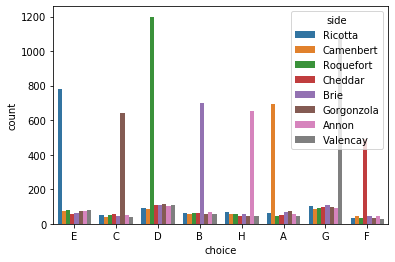

In [180]:
sns.countplot('choice',hue = 'side',data = wine_preference)

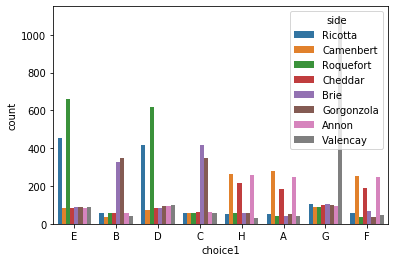

In [181]:
sns.countplot('choice1',hue = 'side',data = wine_preference)

#### 초기에는 choice1을 기준으로 side를 채우려고 했음. 주어진 안주에 따라 나중에 선택한 와인이였기 때문에 choice1이 안주에 영향을 주었다고 생각했으나 choice에 따라 특정한 안주가 주어진것을 발견했으므로 choice를 기준으로 안주의 결측치를 채우기로 결정

In [182]:
wine_preference.head()

,seq,gender,age,job,marital,province,city,side,choice,choice1,prefer,frequency,wineFrequency,rate
0,1,MALE,40대,자영업,MARREID,부산시,기장군,Ricotta,E,E,견고함,2,1,0.500000
1,2,FEMALE,20대,자영업,SINGLE,충청도,천안시,Ricotta,E,E,깊이감,3,1,0.333333
2,3,MALE,40대,임시직,MARREID,서울시,강남구,Camenbert,C,B,깊이감,3,2,0.666667
3,4,FEMALE,50대,벤처직원,MARREID,경상도,거제시,Roquefort,D,D,깊이감,2,1,0.500000
4,5,MALE,30대,교수,MARREID,경기도,포천시,Cheddar,E,E,깊이감,3,2,0.666667


In [183]:
choices = ['E', 'C', 'D', 'B', 'H', 'A', 'G', 'F']
sides = ['Ricotta','Gorgonzola','Roquefort','Brie','Annon','Camenbert','Valencay','Cheddar']

for i in range(len(choices)):
    wine_preference[(wine_preference['side'].isnull())&(wine_preference['choice']==choices[i])] = wine_preference[(wine_preference['side'].isnull())&(wine_preference['choice']==choices[i])].fillna(sides[i])

In [184]:
wine_preference.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10000 entries, 0 to 9999
Data columns (total 14 columns):
seq              10000 non-null int64
gender           10000 non-null object
age              10000 non-null object
job              10000 non-null object
marital          10000 non-null object
province         10000 non-null object
city             10000 non-null object
side             10000 non-null object
choice           10000 non-null object
choice1          10000 non-null object
prefer           10000 non-null object
frequency        10000 non-null int64
wineFrequency    10000 non-null int64
rate             10000 non-null float64
dtypes: float64(1), int64(3), object(10)
memory usage: 1.5+ MB


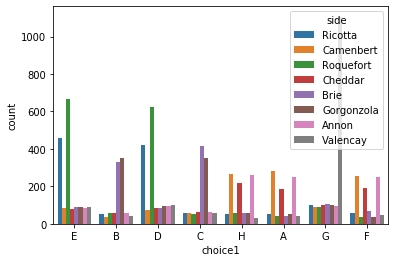

In [185]:
sns.countplot('choice1',hue = 'side',data = wine_preference)

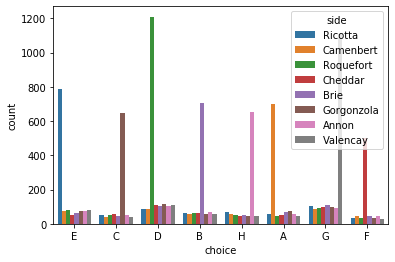

In [186]:
sns.countplot('choice',hue = 'side',data = wine_preference)

### 결측치 채우기 총 코드

In [4]:
wine_preference

,seq,gender,age,job,marital,province,city,choice
0,1.0,MALE,40대,자영업,MARREID,부산시,기장군,E
1,2.0,FEMALE,20대,자영업,SINGLE,충청도,천안시,E
2,3.0,MALE,40대,임시직,MARREID,서울시,강남구,C
3,4.0,FEMALE,50대,벤처직원,MARREID,경상도,거제시,D
4,5.0,MALE,30대,교수,MARREID,경기도,포천시,E
5,6.0,FEMALE,40대,자영업,SINGLE,충청도,진천군,B
6,7.0,MALE,20대,회사직원,SINGLE,경기도,화성시,B
7,8.0,FEMALE,50대,중소기업직원,MARREID,경기도,화성시,D
8,9.0,FEMALE,40대,회사직원,MARREID,경기도,포천시,D
9,10.0,FEMALE,20대,중소기업직원,MARREID,서울시,강북구,D


In [35]:
wine_preference = pd.read_csv('wine_preference.csv',encoding = 'cp949')
wine_side = pd.read_csv('wine_side.csv',encoding = 'cp949')
wine_frequency = pd.read_csv('wine_frequency.csv',encoding = 'cp949')

In [36]:
wine_preference['seq'] = [i for i in range(1,10001)]

test = pd.merge(wine_side,wine_preference,on = 'seq')
wine_preference = pd.merge(test,wine_frequency,on = 'seq')
test = test[['seq', 'gender', 'age', 'job', 'marital', 'province',
       'city', 'side', 'choice', 'choice1']]
wine_preference = pd.merge(test,wine_frequency,on = 'seq')
wine_preference['rate'] = wine_preference['wineFrequency']/wine_preference['frequency']

cities = ['청주시', '화성시', '사하구', '양천구', '강남구', '광양시', '강북구', '포천시', '안양시',
       '마포구', '함안군', '해운대구', '구례군', '기장군', '포항시 북구', '천안시', '강동구',
       '포항시 남구']
provinces = ['충청도','경기도','부산시','서울시','서울시','전라도','서울시','경기도','경기도','서울시','경상도','부산시','전라도','부산시','경상도','충청도','서울시','경상도']

for i in range(18):
    wine_preference[(wine_preference['province'].isnull()) & (wine_preference['city']==cities[i])] = wine_preference[(wine_preference['province'].isnull()) & (wine_preference['city']==cities[i])].fillna(provinces[i])


wine_preference['gender'] = wine_preference['gender'].replace('UNKNOW','UNKNOWN')
wine_preference['gender'] = wine_preference['gender'].fillna('UNKNOWN')
wine_preference['marital'] = wine_preference['marital'].fillna('UNKNOWN')

choices = ['E', 'C', 'D', 'B', 'H', 'A', 'G', 'F']
sides = ['Ricotta','Gorgonzola','Roquefort','Brie','Annon','Camenbert','Valencay','Cheddar']

for i in range(len(choices)):
    wine_preference[(wine_preference['side'].isnull())&(wine_preference['choice']==choices[i])] = wine_preference[(wine_preference['side'].isnull())&(wine_preference['choice']==choices[i])].fillna(sides[i])
    
wine_preference['rate'] = wine_preference['wineFrequency']/wine_preference['frequency']    

#### rate가 1을 넘어가는 이상치 처리하기(frequency와 wineFrequency를 교체)

In [37]:
for i in range(len(wine_preference)):
    if wine_preference['rate'][i] > 1:
        tmp = wine_preference['frequency'][i]
        wine_preference['frequency'][i] = wine_preference['wineFrequency'][i]
        wine_preference['wineFrequency'][i] = tmp

wine_preference['rate'] = wine_preference['wineFrequency']/wine_preference['frequency']
wine_preference['rate'] = wine_preference['rate'].fillna(0)

/home/pirl/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.
/home/pirl/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """


### 탐색적 분석

In [7]:
wine_preference

,seq,gender,age,job,marital,province,city,side,choice,choice1,prefer,frequency,wineFrequency,rate
0,1,MALE,40대,자영업,MARREID,부산시,기장군,Ricotta,E,E,견고함,2,1,0.500000
1,2,FEMALE,20대,자영업,SINGLE,충청도,천안시,Ricotta,E,E,깊이감,3,1,0.333333
2,3,MALE,40대,임시직,MARREID,서울시,강남구,Camenbert,C,B,깊이감,3,2,0.666667
3,4,FEMALE,50대,벤처직원,MARREID,경상도,거제시,Roquefort,D,D,깊이감,2,1,0.500000
4,5,MALE,30대,교수,MARREID,경기도,포천시,Cheddar,E,E,깊이감,3,2,0.666667
5,6,FEMALE,40대,자영업,SINGLE,충청도,진천군,Brie,B,B,견고함,1,1,1.000000
6,7,MALE,20대,회사직원,SINGLE,경기도,화성시,Brie,B,C,깊이감,2,1,0.500000
7,8,FEMALE,50대,중소기업직원,MARREID,경기도,화성시,Roquefort,D,E,견고함,4,2,0.500000
8,9,FEMALE,40대,회사직원,MARREID,경기도,포천시,Brie,D,E,깊이감,3,1,0.333333
9,10,FEMALE,20대,중소기업직원,MARREID,서울시,강북구,Roquefort,D,D,견고함,3,2,0.666667


## 고객군 별 와인의 구매 비율

### 성별 각 와인의 구매비율

In [8]:
choices = ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H']
gender_list = wine_preference['gender'].unique()
for i in choices:
    for j in range(len(gender_list)):
        print('choice',i)
        print(gender_list[j],len(wine_preference[(wine_preference['gender']==gender_list[j])&(wine_preference['choice']==i)])/len(wine_preference[wine_preference['gender']==gender_list[j]]))
    print('')

choice A
MALE 0.1973026973026973
choice A
FEMALE 0.051900217646074
choice A
UNKNOWN 0.043478260869565216

choice B
MALE 0.04895104895104895
choice B
FEMALE 0.15653775322283608
choice B
UNKNOWN 0.043478260869565216

choice C
MALE 0.1003996003996004
choice C
FEMALE 0.09693621295831241
choice C
UNKNOWN 0.13043478260869565

choice D
MALE 0.14060939060939062
choice D
FEMALE 0.22685417713042022
choice D
UNKNOWN 0.17391304347826086

choice E
MALE 0.11038961038961038
choice E
FEMALE 0.14146994809978236
choice E
UNKNOWN 0.08695652173913043

choice F
MALE 0.08591408591408592
choice F
FEMALE 0.07048384396450695
choice F
UNKNOWN 0.08695652173913043

choice G
MALE 0.1515984015984016
choice G
FEMALE 0.1962163067135443
choice G
UNKNOWN 0.2608695652173913

choice H
MALE 0.16483516483516483
choice H
FEMALE 0.05960154026452369
choice H
UNKNOWN 0.17391304347826086



### 풍미별 와인의 구매비율

In [89]:
choices = ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H']
test_list = wine_preference['prefer'].unique()
for i in choices:
    for j in range(len(test_list)):
        print('choice',i)
        print(test_list[j],len(wine_preference[(wine_preference['prefer']==test_list[j])&(wine_preference['choice']==i)])/len(wine_preference[wine_preference['prefer']==test_list[j]]))
    print('')

choice A
견고함 0.11138161898965307
choice A
깊이감 0.10885426937487674

choice B
견고함 0.10894704808277542
choice B
깊이감 0.11733385919936896

choice C
견고함 0.10002028809089064
choice C
깊이감 0.09682508380989943

choice D
견고함 0.18827348346520592
choice D
깊이감 0.19601656478012228

choice E
견고함 0.13106106715358085
choice E
깊이감 0.1267994478406626

choice F
견고함 0.08074660174477581
choice F
깊이감 0.07276671267994478

choice G
견고함 0.1761006289308176
choice G
깊이감 0.1808321830013804

choice H
견고함 0.10346926354230067
choice H
깊이감 0.10057187931374482



### 지역별 와인의 구매비율

In [87]:
choices = ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H']
test_list = wine_preference['city'].unique()
for i in choices:
    for j in range(len(test_list)):
        print('choice',i)
        print(test_list[j],len(wine_preference[(wine_preference['city']==test_list[j])&(wine_preference['choice']==i)])/len(wine_preference[wine_preference['city']==test_list[j]]))
    print('')

choice A
기장군 0.12601626016260162
choice A
천안시 0.06403940886699508
choice A
강남구 0.11705685618729098
choice A
거제시 0.08900523560209424
choice A
포천시 0.09057301293900184
choice A
진천군 0.06451612903225806
choice A
화성시 0.11195445920303605
choice A
강북구 0.1038961038961039
choice A
사하구 0.1242603550295858
choice A
해운대구 0.10241657077100115
choice A
마포구 0.11931818181818182
choice A
양천구 0.10826542491268917
choice A
포항시 남구 0.11967545638945233
choice A
청주시 0.11259079903147699
choice A
곡성군 0.10576923076923077
choice A
광양시 0.1323529411764706
choice A
연제구 0.09574468085106383
choice A
포항시 북구 0.10116731517509728
choice A
강동구 0.125
choice A
하동군 0.13592233009708737
choice A
구례군 0.14705882352941177
choice A
해남군 0.12195121951219512
choice A
평택시 0.09795918367346938
choice A
진구 0.09900990099009901
choice A
가평군 0.12313432835820895
choice A
홍성군 0.1164021164021164
choice A
안양시 0.1016260162601626
choice A
충주시 0.05102040816326531
choice A
함안군 0.11594202898550725
choice A
익산시 0.1111111111111111

choice B
기장군 0.11788617

In [88]:
choices = ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H']
test_list = wine_preference['province'].unique()
for i in choices:
    for j in range(len(test_list)):
        print('choice',i)
        print(test_list[j],len(wine_preference[(wine_preference['province']==test_list[j])&(wine_preference['choice']==i)])/len(wine_preference[wine_preference['province']==test_list[j]]))
    print('')

choice A
부산시 0.10984095427435388
choice A
충청도 0.09865152590489709
choice A
서울시 0.11476635514018692
choice A
경상도 0.1137370753323486
choice A
경기도 0.10399562123700054
choice A
전라도 0.12448132780082988

choice B
부산시 0.10487077534791253
choice B
충청도 0.12845990063875087
choice B
서울시 0.11439252336448598
choice B
경상도 0.12186115214180207
choice B
경기도 0.09742747673782157
choice B
전라도 0.12586445366528354

choice C
부산시 0.10188866799204771
choice C
충청도 0.10858765081618169
choice C
서울시 0.09682242990654205
choice C
경상도 0.10782865583456426
choice C
경기도 0.09140667761357417
choice C
전라도 0.07468879668049792

choice D
부산시 0.18886679920477137
choice D
충청도 0.19020581973030518
choice D
서울시 0.18429906542056074
choice D
경상도 0.20014771048744462
choice D
경기도 0.19759168035030103
choice D
전라도 0.20608575380359612

choice E
부산시 0.13717693836978131
choice E
충청도 0.11710432931156849
choice E
서울시 0.13345794392523364
choice E
경상도 0.12038404726735598
choice E
경기도 0.13683634373289547
choice E
전라도 0.1078838174273859

choice 

### 결혼 유무별 와인의 구매비율

In [85]:
choices = ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H']
test_list = wine_preference['marital'].unique()
for i in choices:
    for j in range(len(test_list)):
        print('choice',i)
        print(test_list[j],len(wine_preference[(wine_preference['marital']==test_list[j])&(wine_preference['choice']==i)])/len(wine_preference[wine_preference['marital']==test_list[j]]))
    print('')

choice A
MARREID 0.13829169087739687
choice A
SINGLE 0.046443650535888274
choice A
UNKNOWN 0.16216216216216217

choice B
MARREID 0.13175479372457874
choice B
SINGLE 0.07210133160116922
choice B
UNKNOWN 0.08108108108108109

choice C
MARREID 0.107931435212086
choice C
SINGLE 0.07762260474179929
choice C
UNKNOWN 0.05405405405405406

choice D
MARREID 0.2010459035444509
choice D
SINGLE 0.1718090289054888
choice D
UNKNOWN 0.24324324324324326

choice E
MARREID 0.12884950610110402
choice E
SINGLE 0.1292627476453394
choice E
UNKNOWN 0.10810810810810811

choice F
MARREID 0.08338175479372457
choice F
SINGLE 0.062033127638843784
choice F
UNKNOWN 0.05405405405405406

choice G
MARREID 0.15107495642068564
choice G
SINGLE 0.2390386489119844
choice G
UNKNOWN 0.24324324324324326

choice H
MARREID 0.05766995932597327
choice H
SINGLE 0.20168886001948685
choice H
UNKNOWN 0.05405405405405406



### 직업별 와인의 구매비율

In [84]:
choices = ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H']
test_list = wine_preference['job'].unique()
for i in choices:
    for j in range(len(test_list)):
        print('choice',i)
        print(test_list[j],len(wine_preference[(wine_preference['job']==test_list[j])&(wine_preference['choice']==i)])/len(wine_preference[wine_preference['job']==test_list[j]]))
    print('')

choice A
자영업 0.016147635524798153
choice A
임시직 0.0630841121495327
choice A
벤처직원 0.09333333333333334
choice A
교수 0.24436090225563908
choice A
회사직원 0.0975609756097561
choice A
중소기업직원 0.07875647668393783
choice A
연구원 0.231203007518797
choice A
공무원 0.07306889352818371
choice A
기자 0.24
choice A
의사 0.23238095238095238
choice A
변호사 0.2851485148514851
choice A
학생 0.023316062176165803
choice A
미상 0.0

choice B
자영업 0.14821222606689735
choice B
임시직 0.0794392523364486
choice B
벤처직원 0.12571428571428572
choice B
교수 0.03571428571428571
choice B
회사직원 0.13170731707317074
choice B
중소기업직원 0.1378238341968912
choice B
연구원 0.05639097744360902
choice B
공무원 0.13569937369519833
choice B
기자 0.03
choice B
의사 0.045714285714285714
choice B
변호사 0.055445544554455446
choice B
학생 0.3290155440414508
choice B
미상 0.0

choice C
자영업 0.11130334486735871
choice C
임시직 0.06931464174454828
choice C
벤처직원 0.023809523809523808
choice C
교수 0.18609022556390978
choice C
회사직원 0.0175609756097561
choice C
중소기업직원 0.01865284974093264
choi

In [181]:
test_list = wine_preference['job'].unique()
choices = wine_preference['choice'].unique()
for i in test_list:
    for j in range(len(choices)):
        print('job',i)
        print(choices[j],len(wine_preference[(wine_preference['job']==i)&(wine_preference['choice']==choices[j])])/len(wine_preference[wine_preference['job']==i]))

job 자영업
E 0.1510957324106113
job 자영업
C 0.11130334486735871
job 자영업
D 0.07497116493656286
job 자영업
B 0.14821222606689735
job 자영업
H 0.029988465974625143
job 자영업
A 0.016147635524798153
job 자영업
G 0.4342560553633218
job 자영업
F 0.034025374855824686
job 임시직
E 0.07866043613707165
job 임시직
C 0.06931464174454828
job 임시직
D 0.08722741433021806
job 임시직
B 0.0794392523364486
job 임시직
H 0.06619937694704049
job 임시직
A 0.0630841121495327
job 임시직
G 0.4961059190031153
job 임시직
F 0.05996884735202492
job 벤처직원
E 0.07238095238095238
job 벤처직원
C 0.023809523809523808
job 벤처직원
D 0.3380952380952381
job 벤처직원
B 0.12571428571428572
job 벤처직원
H 0.18761904761904763
job 벤처직원
A 0.09333333333333334
job 벤처직원
G 0.039047619047619046
job 벤처직원
F 0.12
job 교수
E 0.22556390977443608
job 교수
C 0.18609022556390978
job 교수
D 0.07706766917293233
job 교수
B 0.03571428571428571
job 교수
H 0.05639097744360902
job 교수
A 0.24436090225563908
job 교수
G 0.10526315789473684
job 교수
F 0.06954887218045112
job 회사직원
E 0.06926829268292684
job 회사직원
C 0.017560975609

### 나이별 와인의 구매비율

In [83]:
choices = ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H']
test_list = wine_preference['age'].unique()
for i in choices:
    for j in range(len(test_list)):
        print('choice',i)
        print(test_list[j],len(wine_preference[(wine_preference['age']==test_list[j])&(wine_preference['choice']==i)])/len(wine_preference[wine_preference['age']==test_list[j]]))
    print('')

choice A
40대 0.09288873766587274
choice A
20대 0.021421107628004178
choice A
50대 0.2686450605232331
choice A
30대 0.02406199021207178
choice A
60대 이상 0.31746031746031744
choice A
미상 0.0

choice B
40대 0.03334467505954406
choice B
20대 0.3056426332288401
choice B
50대 0.03162827020695041
choice B
30대 0.14926590538336051
choice B
60대 이상 0.007936507936507936
choice B
미상 0.125

choice C
40대 0.15753657706702962
choice C
20대 0.12330198537095088
choice C
50대 0.06481843030066381
choice C
30대 0.04608482871125612
choice C
60대 이상 0.03968253968253968
choice C
미상 0.125

choice D
40대 0.24123851650221165
choice D
20대 0.10919540229885058
choice D
50대 0.2522452167122218
choice D
30대 0.13376835236541598
choice D
60대 이상 0.23015873015873015
choice D
미상 0.125

choice E
40대 0.054780537597822386
choice E
20대 0.12957157784743992
choice E
50대 0.03826630222569309
choice E
30대 0.316068515497553
choice E
60대 이상 0.047619047619047616
choice E
미상 0.125

choice F
40대 0.03198366791425655
choice F
20대 0.19540229885057472
ch

### 시음회에 참여한 사람들의 수를 특징별로 세기

In [90]:
wine_preference.columns

Index(['seq', 'gender', 'age', 'job', 'marital', 'province', 'city', 'side',
       'choice', 'choice1', 'prefer', 'frequency', 'wineFrequency', 'rate'],
      dtype='object')

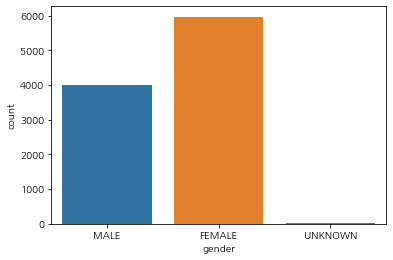

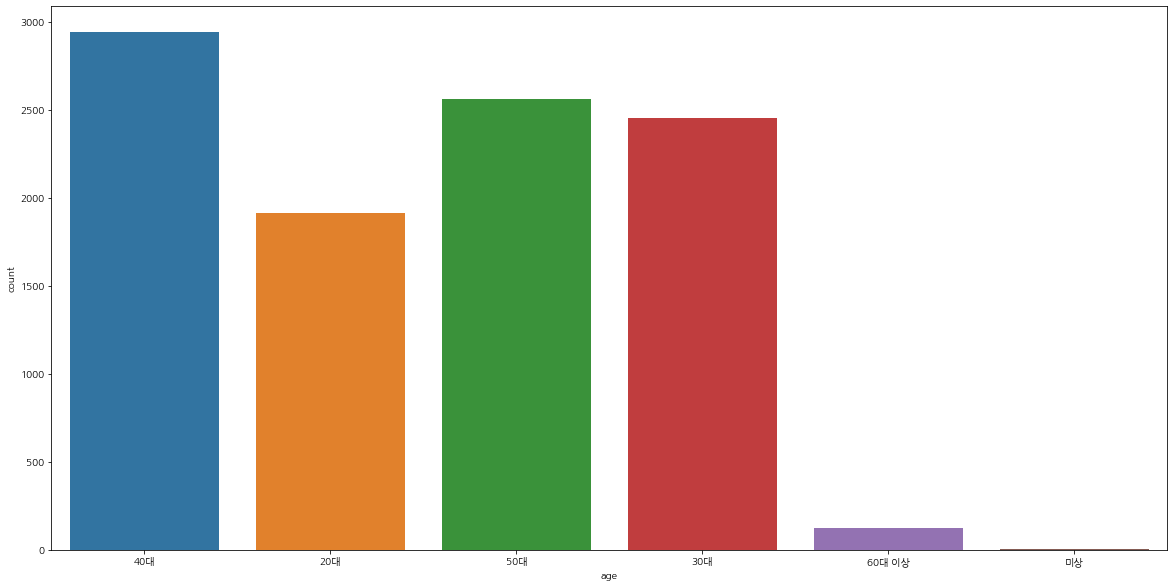

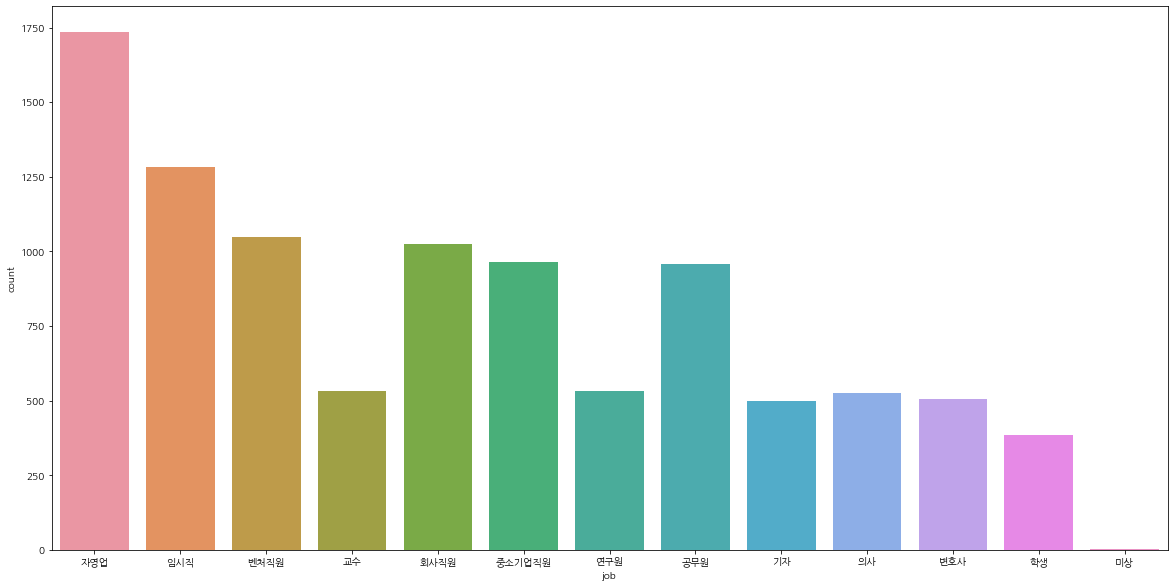

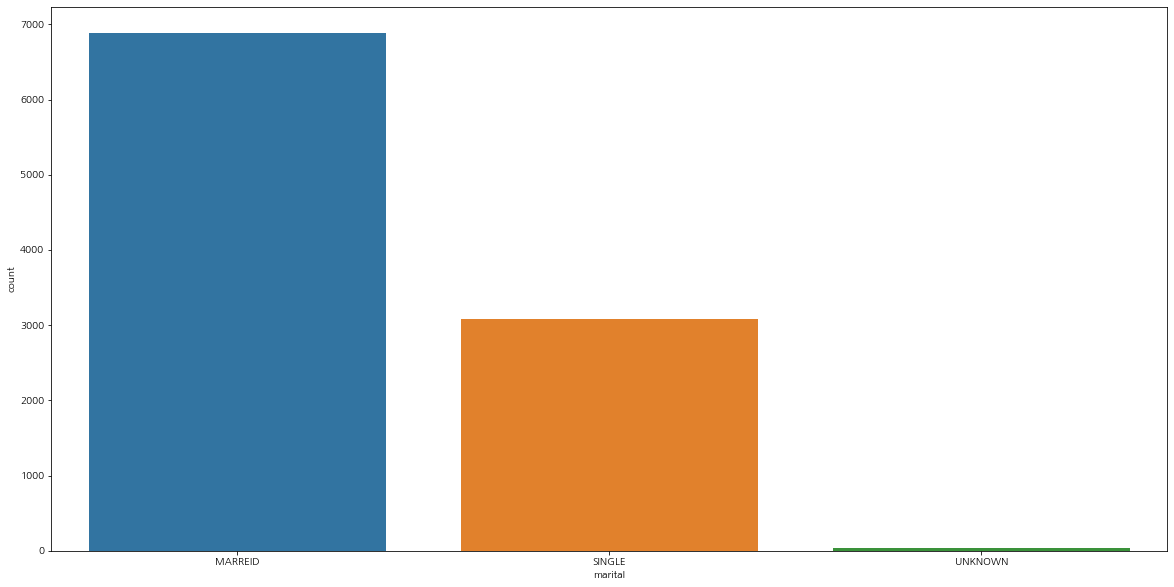

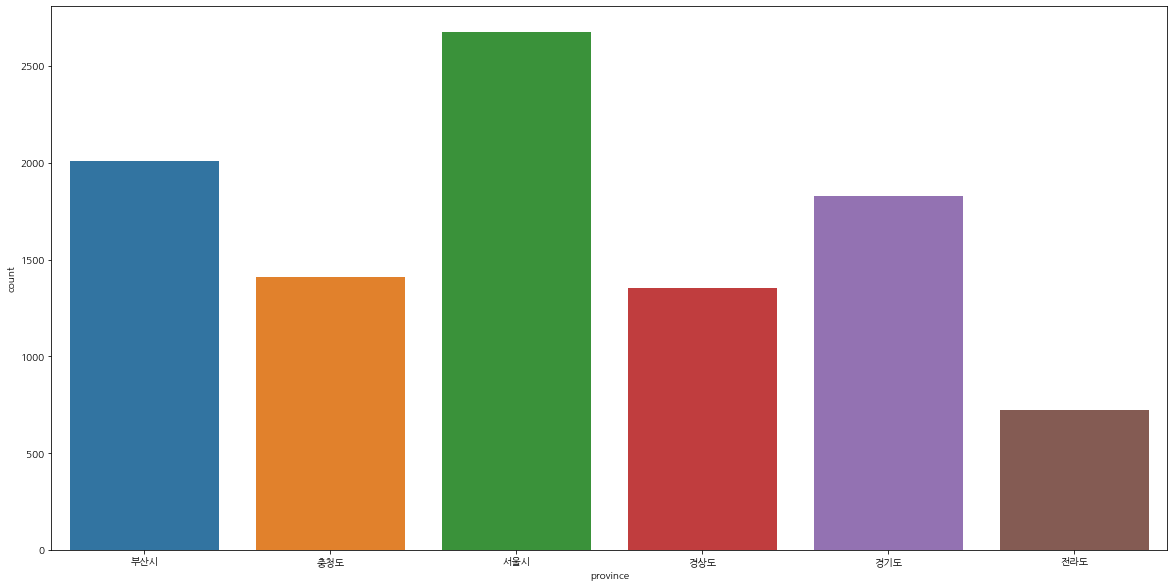

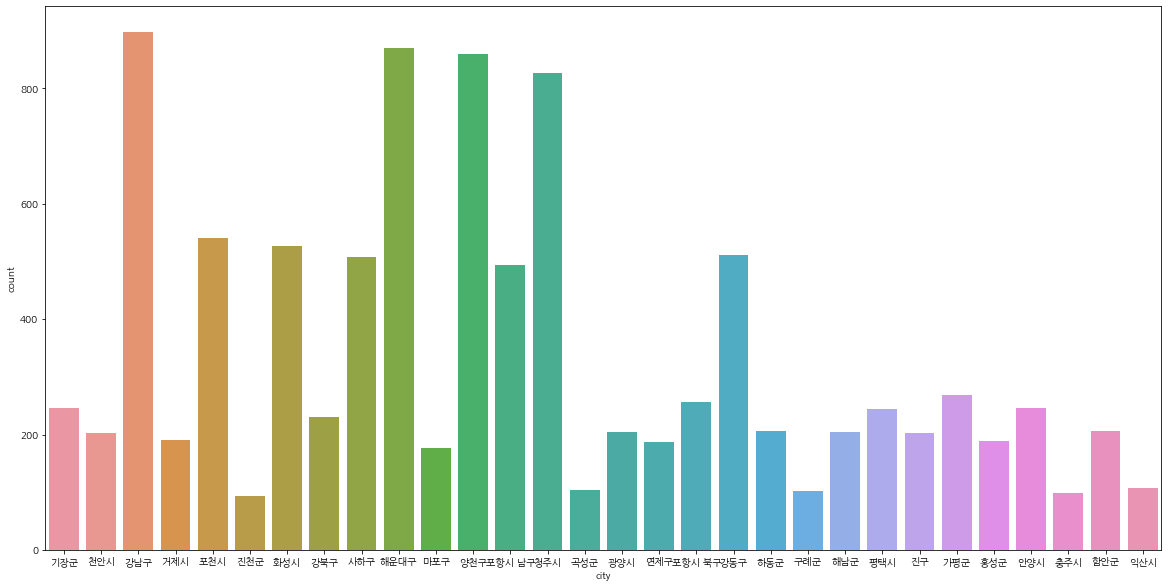

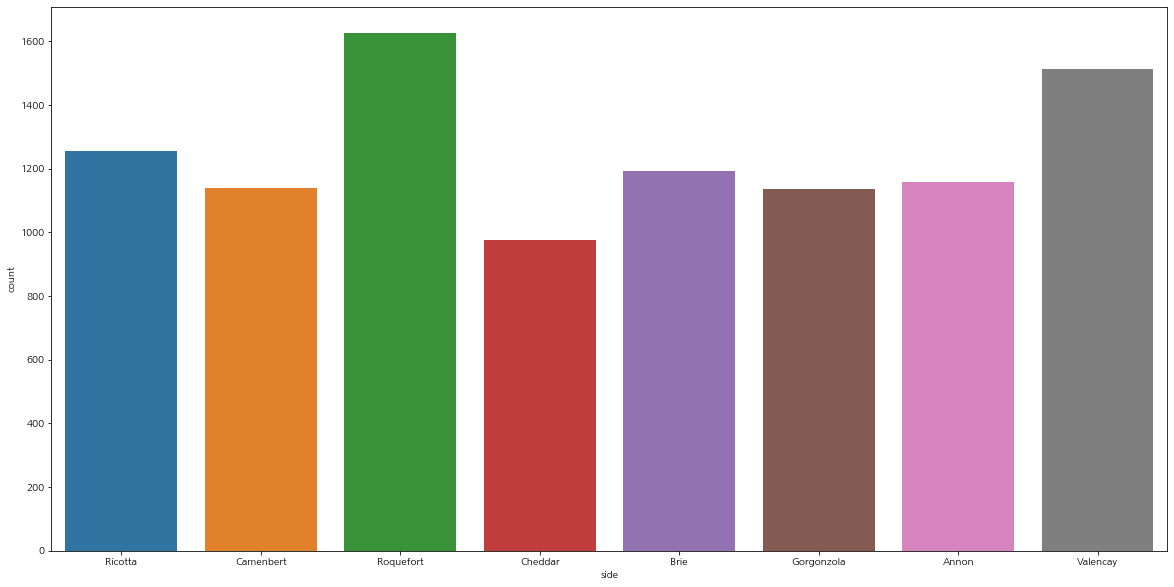

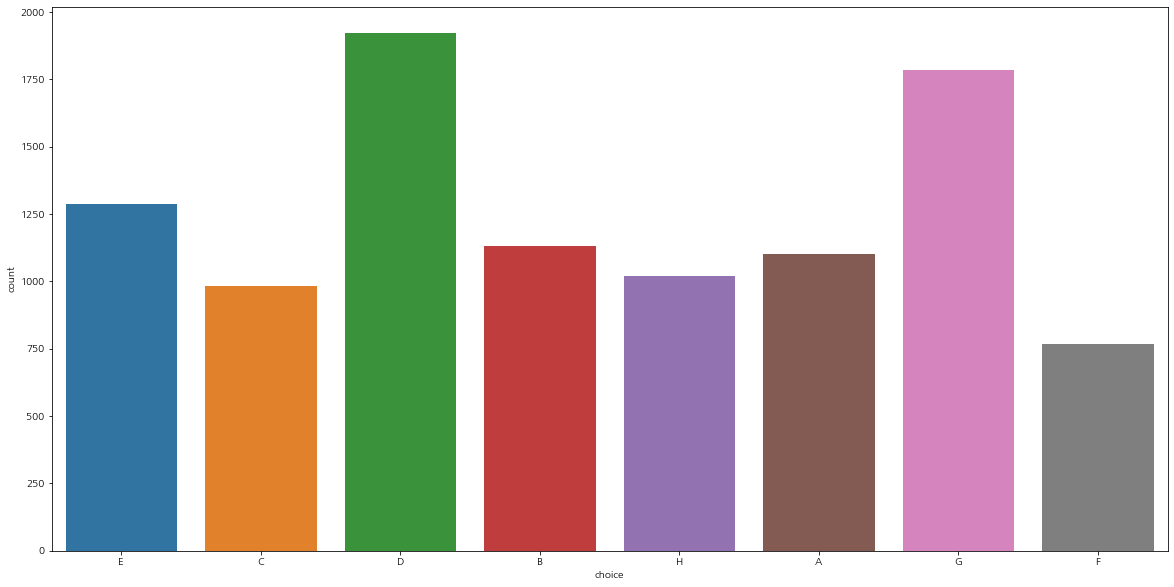

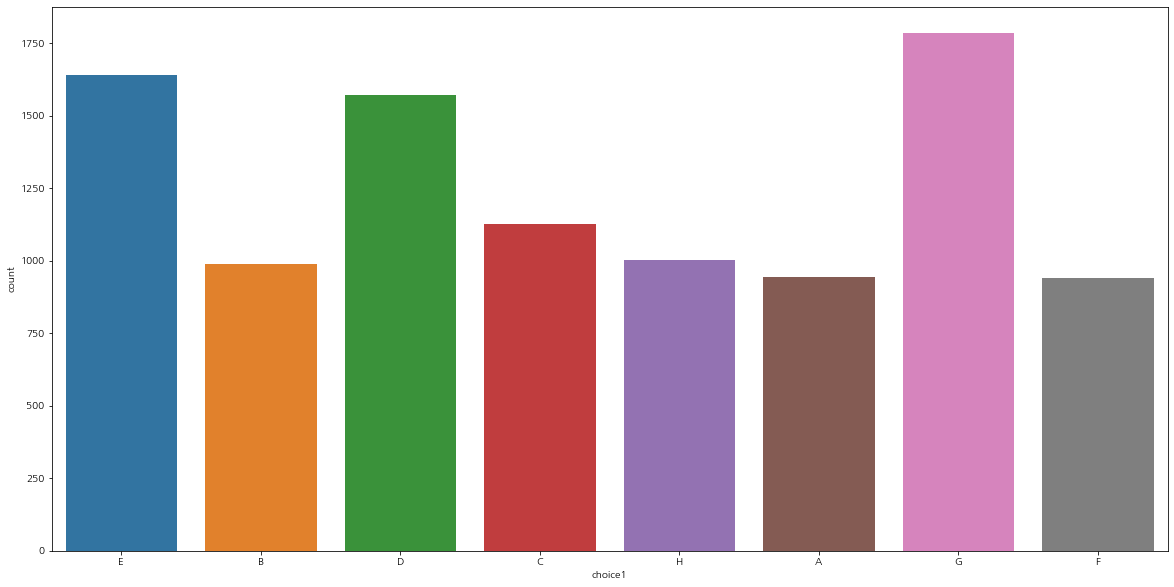

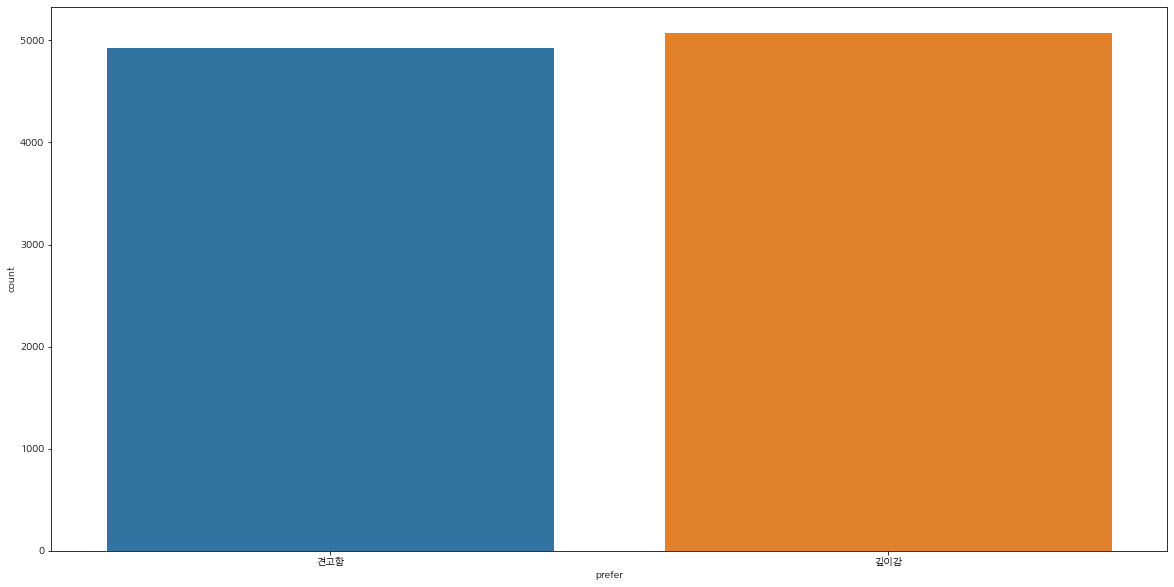

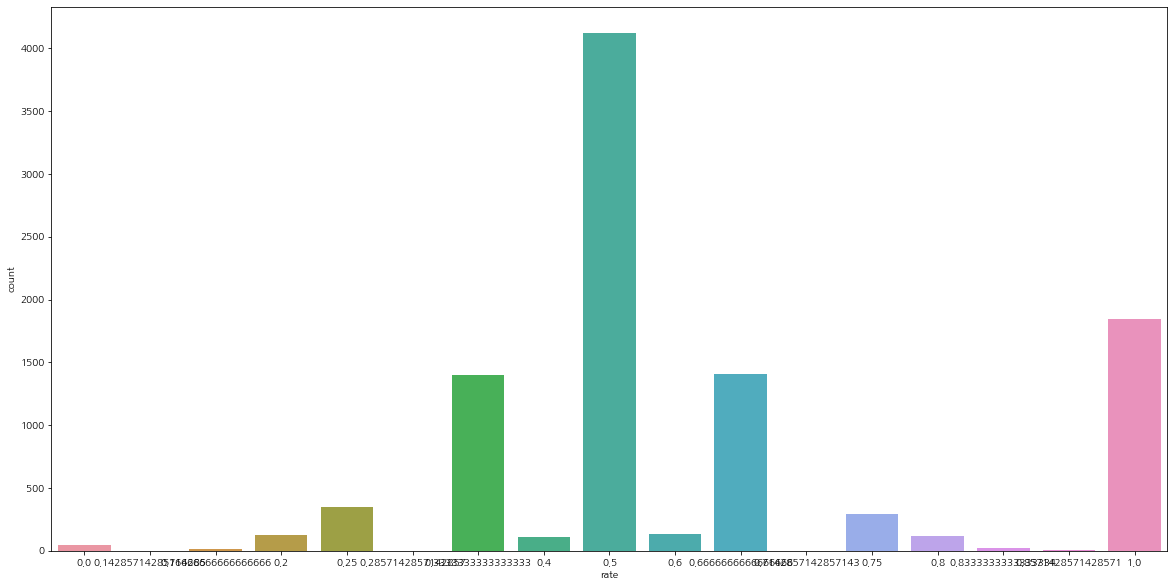

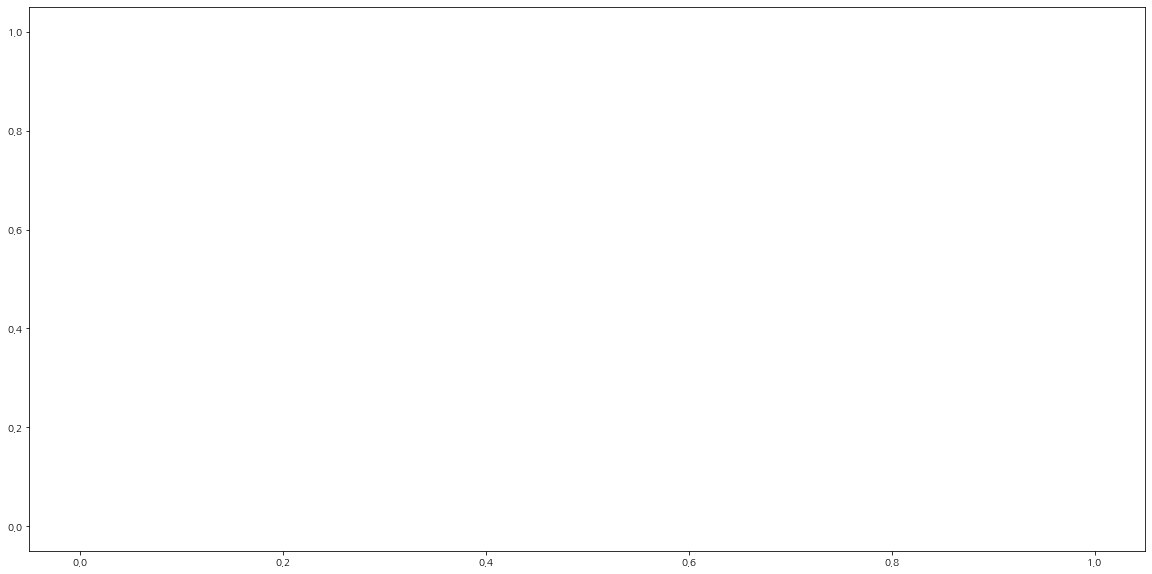

In [116]:
columns_list = ['gender', 'age', 'job', 'marital', 'province', 'city', 'side',
       'choice', 'choice1', 'prefer','rate']
for i in columns_list:
    sns.countplot(i,data = wine_preference)
    plt.figure(figsize=(20, 10))
    plt.plot()

### 치즈의 종류별로 선호하는 와인

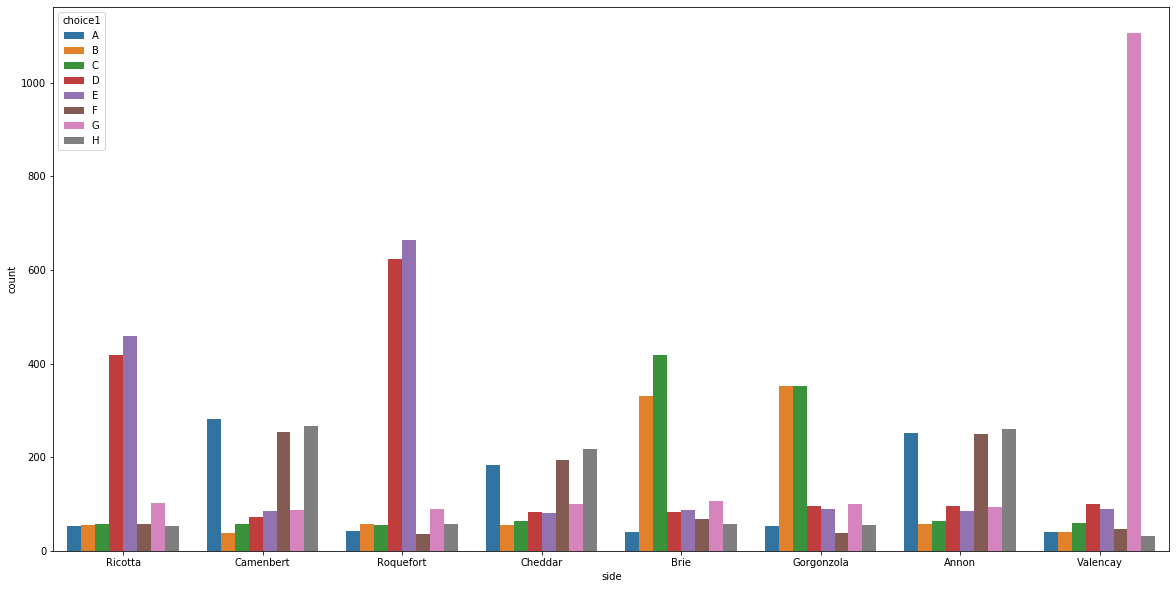

In [50]:
plt.figure(figsize=(20, 10))
plt.plot()
sns.countplot('side',hue = 'choice1',data = wine_preference,hue_order=['A','B','C','D','E','F','G','H'])

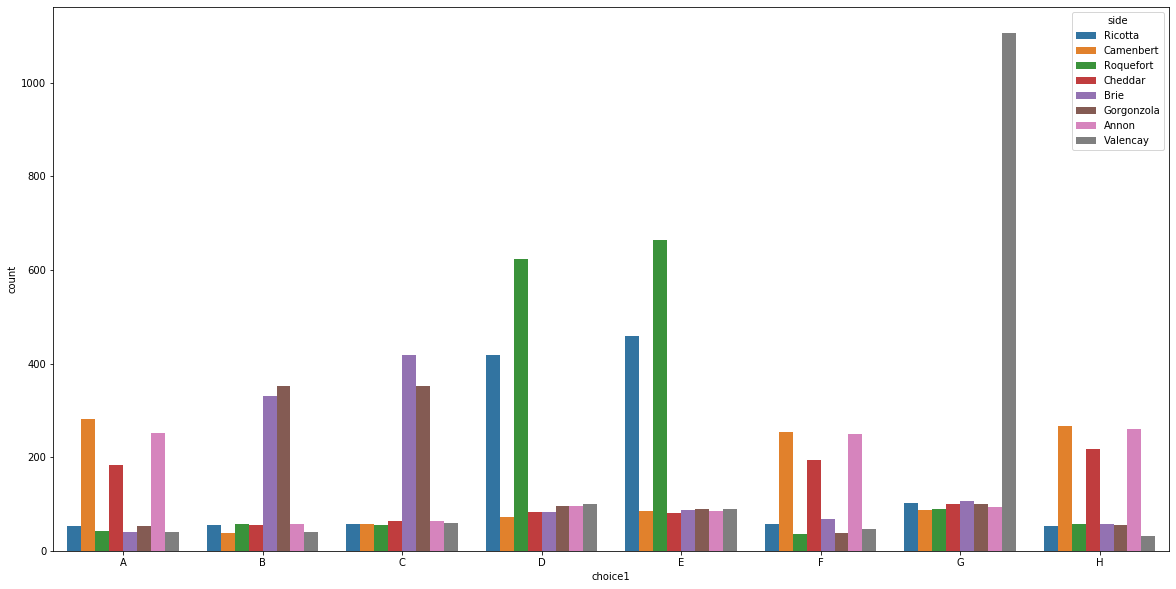

In [66]:
plt.figure(figsize=(20, 10))
plt.plot()
sns.countplot('choice1',hue = 'side',data = wine_preference,order=['A','B','C','D','E','F','G','H'])

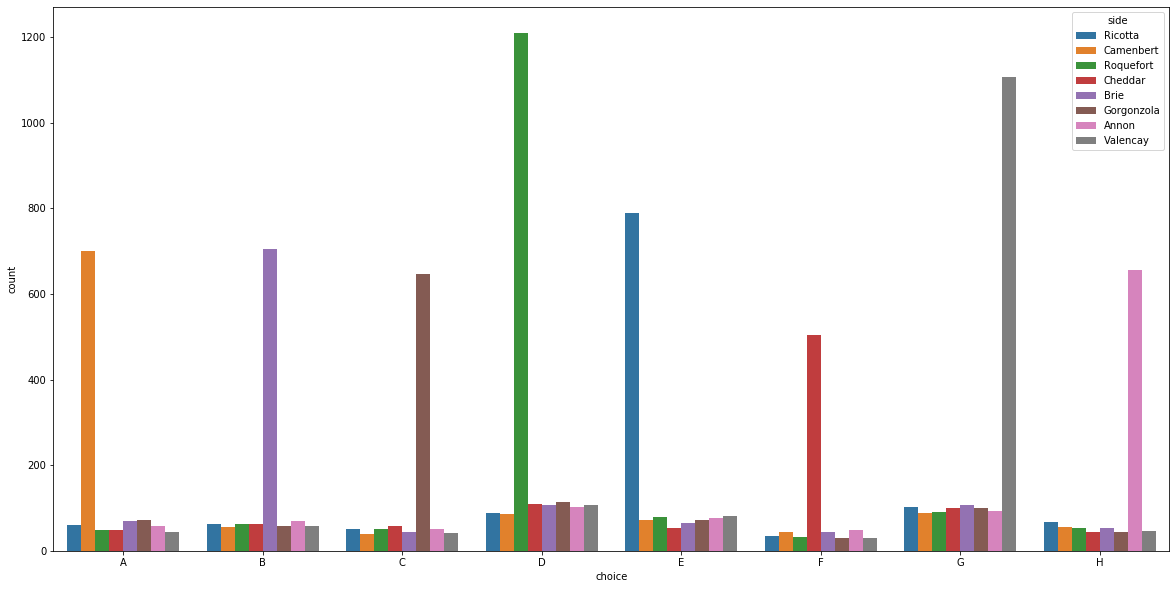

In [67]:
plt.figure(figsize=(20, 10))
plt.plot()
sns.countplot('choice',hue = 'side',data = wine_preference,order = ['A','B','C','D','E','F','G','H'])


#### 위의 그래프를 통해 각 와인별로 가장 많이 선호 하는 치즈의 종류가 있음을 알 수 있음

In [64]:
choices = ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H']
test_list = wine_preference['side'].unique()
for i in choices:
    for j in range(len(test_list)):
        print('choice',i,test_list[j])
        print(len(wine_preference[(wine_preference['choice1']==i)&(wine_preference['side']==test_list[j])]))
    print('')

choice A Ricotta
52
choice A Camenbert
281
choice A Roquefort
42
choice A Cheddar
184
choice A Brie
40
choice A Gorgonzola
53
choice A Annon
252
choice A Valencay
41

choice B Ricotta
55
choice B Camenbert
38
choice B Roquefort
58
choice B Cheddar
56
choice B Brie
331
choice B Gorgonzola
351
choice B Annon
58
choice B Valencay
41

choice C Ricotta
58
choice C Camenbert
58
choice C Roquefort
55
choice C Cheddar
63
choice C Brie
418
choice C Gorgonzola
353
choice C Annon
64
choice C Valencay
59

choice D Ricotta
419
choice D Camenbert
72
choice D Roquefort
623
choice D Cheddar
83
choice D Brie
83
choice D Gorgonzola
96
choice D Annon
96
choice D Valencay
100

choice E Ricotta
458
choice E Camenbert
85
choice E Roquefort
665
choice E Cheddar
81
choice E Brie
88
choice E Gorgonzola
89
choice E Annon
84
choice E Valencay
89

choice F Ricotta
57
choice F Camenbert
253
choice F Roquefort
36
choice F Cheddar
193
choice F Brie
69
choice F Gorgonzola
38
choice F Annon
249
choice F Valencay
46

c

### feature의 변수 중요도

In [31]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib

from sklearn.tree import export_graphviz
import graphviz

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix

In [32]:
wine_preference = pd.read_csv('wine_preference.csv',encoding = 'cp949')
wine_side = pd.read_csv('wine_side.csv',encoding = 'cp949')
wine_frequency = pd.read_csv('wine_frequency.csv',encoding = 'cp949')
wine_area_grade = pd.read_csv('wine_area_grade.csv',encoding = 'cp949')

In [33]:
wine_preference['seq'] = [i for i in range(1,10001)]

test = pd.merge(wine_side,wine_preference,on = 'seq')
wine_preference = pd.merge(test,wine_frequency,on = 'seq')
test = test[['seq', 'gender', 'age', 'job', 'marital', 'province',
       'city', 'side', 'choice', 'choice1']]
wine_preference = pd.merge(test,wine_frequency,on = 'seq')
wine_preference['rate'] = wine_preference['wineFrequency']/wine_preference['frequency']

cities = ['청주시', '화성시', '사하구', '양천구', '강남구', '광양시', '강북구', '포천시', '안양시',
       '마포구', '함안군', '해운대구', '구례군', '기장군', '포항시 북구', '천안시', '강동구',
       '포항시 남구']
provinces = ['충청도','경기도','부산시','서울시','서울시','전라도','서울시','경기도','경기도','서울시','경상도','부산시','전라도','부산시','경상도','충청도','서울시','경상도']

for i in range(18):
    wine_preference[(wine_preference['province'].isnull()) & (wine_preference['city']==cities[i])] = wine_preference[(wine_preference['province'].isnull()) & (wine_preference['city']==cities[i])].fillna(provinces[i])


wine_preference['gender'] = wine_preference['gender'].replace('UNKNOW','UNKNOWN')
wine_preference['gender'] = wine_preference['gender'].fillna('UNKNOWN')
wine_preference['marital'] = wine_preference['marital'].fillna('UNKNOWN')

choices = ['E', 'C', 'D', 'B', 'H', 'A', 'G', 'F']
sides = ['Ricotta','Gorgonzola','Roquefort','Brie','Annon','Camenbert','Valencay','Cheddar']

for i in range(len(choices)):
    wine_preference[(wine_preference['side'].isnull())&(wine_preference['choice']==choices[i])] = wine_preference[(wine_preference['side'].isnull())&(wine_preference['choice']==choices[i])].fillna(sides[i])
    
wine_preference['rate'] = wine_preference['wineFrequency']/wine_preference['frequency']    

import ast

wine_area_grade['Cities'] = wine_area_grade['Cities'].apply(ast.literal_eval)

result = []
for i in range(10000):
    if wine_preference['city'][i] in wine_area_grade['Cities'][0]:
        result.append('1급지')
    elif wine_preference['city'][i] in wine_area_grade['Cities'][1]:
        result.append('2급지')
    elif wine_preference['city'][i] in wine_area_grade['Cities'][2]:
        result.append('3급지')
    elif wine_preference['city'][i] in wine_area_grade['Cities'][3]:
        result.append('4급지')
    else:
        result.append('5급지')

wine_preference['area_grade'] = result

In [34]:
for i in range(len(wine_preference)):
    if wine_preference['rate'][i] > 1:
        tmp = wine_preference['frequency'][i]
        wine_preference['frequency'][i] = wine_preference['wineFrequency'][i]
        wine_preference['wineFrequency'][i] = tmp

wine_preference['rate'] = wine_preference['wineFrequency']/wine_preference['frequency']
wine_preference['rate'] = wine_preference['rate'].fillna(0)

/home/pirl/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.
/home/pirl/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """


In [35]:
wine_preference.head()

,seq,gender,age,job,marital,province,city,side,choice,choice1,prefer,frequency,wineFrequency,rate,area_grade
0,1,MALE,40대,자영업,MARREID,부산시,기장군,Ricotta,E,E,견고함,2,1,0.500000,1급지
1,2,FEMALE,20대,자영업,SINGLE,충청도,천안시,Ricotta,E,E,깊이감,3,1,0.333333,4급지
2,3,MALE,40대,임시직,MARREID,서울시,강남구,Camenbert,C,B,깊이감,3,2,0.666667,1급지
3,4,FEMALE,50대,벤처직원,MARREID,경상도,거제시,Roquefort,D,D,깊이감,2,1,0.500000,5급지
4,5,MALE,30대,교수,MARREID,경기도,포천시,Cheddar,E,E,깊이감,3,2,0.666667,2급지


In [72]:
important_test = wine_preference

In [73]:
important_test.head()

,seq,gender,age,job,marital,province,city,side,choice,choice1,prefer,frequency,wineFrequency,rate,area_grade
0,1,MALE,40대,자영업,MARREID,부산시,기장군,Ricotta,E,E,견고함,2,1,0.500000,1급지
1,2,FEMALE,20대,자영업,SINGLE,충청도,천안시,Ricotta,E,E,깊이감,3,1,0.333333,4급지
2,3,MALE,40대,임시직,MARREID,서울시,강남구,Camenbert,C,B,깊이감,3,2,0.666667,1급지
3,4,FEMALE,50대,벤처직원,MARREID,경상도,거제시,Roquefort,D,D,깊이감,2,1,0.500000,5급지
4,5,MALE,30대,교수,MARREID,경기도,포천시,Cheddar,E,E,깊이감,3,2,0.666667,2급지


In [74]:
important_test = important_test.drop(['seq','side','choice1'],axis = 1)
important_test.head()

,gender,age,job,marital,province,city,choice,prefer,frequency,wineFrequency,rate,area_grade
0,MALE,40대,자영업,MARREID,부산시,기장군,E,견고함,2,1,0.500000,1급지
1,FEMALE,20대,자영업,SINGLE,충청도,천안시,E,깊이감,3,1,0.333333,4급지
2,MALE,40대,임시직,MARREID,서울시,강남구,C,깊이감,3,2,0.666667,1급지
3,FEMALE,50대,벤처직원,MARREID,경상도,거제시,D,깊이감,2,1,0.500000,5급지
4,MALE,30대,교수,MARREID,경기도,포천시,E,깊이감,3,2,0.666667,2급지


### DataFrame의 value값들을 모두 숫자로 바꾸기

In [75]:
columns_list = ['gender', 'age', 'marital','job', 'province', 'city', 'choice', 'prefer','frequency','wineFrequency','rate','area_grade']

for j in columns_list:
    test_list = sorted(important_test[j].unique())

    for i in range(len(test_list)):
        important_test[j] = important_test[j].replace(test_list[i],i)

In [76]:
important_test.head()

,gender,age,job,marital,province,city,choice,prefer,frequency,wineFrequency,rate,area_grade
0,1,2,9,0,2,8,4,0,2,1,8.0,0
1,0,0,9,1,5,17,4,1,3,1,6.0,3
2,1,2,8,0,3,1,2,1,3,2,10.0,0
3,0,3,4,0,1,4,3,1,2,1,8.0,4
4,1,1,1,0,0,21,4,1,3,2,10.0,1


### 의사결정나무 도전 고고싱

In [77]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib

from sklearn.tree import export_graphviz
import graphviz

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix

In [78]:
import os
os.environ['PATH']+=os.pathsep + 'C:/Program Files(x86)/Graphviz2.38/bin/'

In [63]:
matplotlib.rc('font',family = 'NanumGothic')

In [64]:
important_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10000 entries, 0 to 9999
Data columns (total 9 columns):
gender           10000 non-null int64
age              10000 non-null int64
marital          10000 non-null int64
choice           10000 non-null int64
prefer           10000 non-null int64
frequency        10000 non-null int64
wineFrequency    10000 non-null int64
rate             10000 non-null float64
area_grade       10000 non-null int64
dtypes: float64(1), int64(8)
memory usage: 1.1 MB


In [65]:
df_raw_x = important_test.drop('choice',axis = 1,inplace = False)
df_raw_y = important_test['choice']

In [66]:
tree_final=DecisionTreeClassifier(min_samples_leaf=12,min_samples_split=30,
random_state=1234)
tree_final.fit(df_raw_x,df_raw_y)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=12, min_samples_split=30,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=1234, splitter='best')

In [67]:
v_feature_name = df_raw_x.columns

In [68]:
import pydot

In [71]:

(graph,) = pydot.graph_from_dot_file('tree_final.dot')
graph.write_png('test.png')

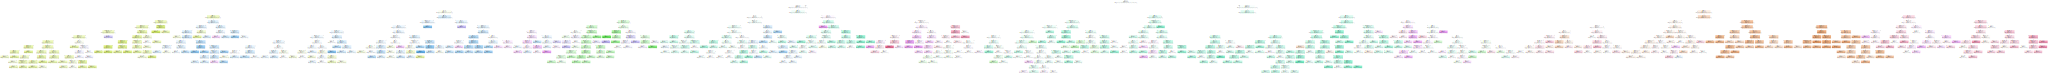

In [70]:
export_graphviz(tree_final,out_file='tree_final.dot',
feature_names=v_feature_name,impurity=True,filled=True)
with open('tree_final.dot') as f:
    dot_graph=f.read()
    dot_graph=f.read(display(graphviz.Source(dot_graph)))

In [489]:
tree_DT = DecisionTreeClassifier(random_state = 1234)
tree_DT.fit(df_raw_x,df_raw_y)

print(tree_DT.score(df_raw_x,df_raw_y))


0.9392


In [490]:
v_feature_name = df_raw_x.columns

Text(0, 0.5, '설명변수')

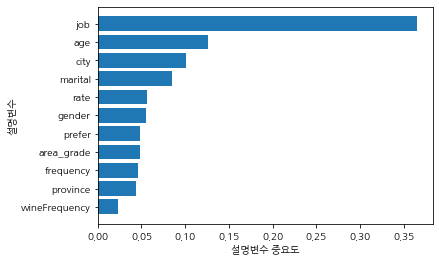

In [491]:
df_importance = pd.DataFrame()
df_importance['Feature'] = v_feature_name
df_importance['Importance'] = tree_DT.feature_importances_

df_importance.sort_values('Importance',ascending = True,inplace = True)
coordinates = range(len(df_importance))
plt.barh(y=coordinates,width = df_importance['Importance'])
plt.yticks(coordinates,df_importance['Feature'])
plt.xlabel('설명변수 중요도')
plt.ylabel('설명변수')

In [492]:
df_importance

,Feature,Importance
8,wineFrequency,0.023618
4,province,0.043816
7,frequency,0.045558
10,area_grade,0.048725
6,prefer,0.048836
0,gender,0.055397
9,rate,0.056849
3,marital,0.085173
5,city,0.101008
1,age,0.126559


### 랜덤포레스트

In [493]:
tree_RF = RandomForestClassifier(random_state = 1234)
tree_RF.fit(df_raw_x,df_raw_y)

/home/pirl/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=1234,
                       verbose=0, warm_start=False)

Text(0, 0.5, '설명변수')

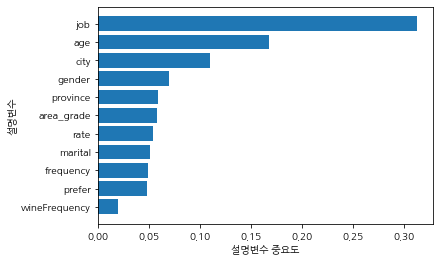

In [494]:
df_importance = pd.DataFrame()
df_importance['Feature'] = v_feature_name
df_importance['Importance'] = tree_RF.feature_importances_

df_importance.sort_values('Importance',ascending = True,inplace = True)
coordinates = range(len(df_importance))
plt.barh(y=coordinates,width = df_importance['Importance'])
plt.yticks(coordinates,df_importance['Feature'])
plt.xlabel('설명변수 중요도')
plt.ylabel('설명변수')

In [495]:
df_importance

,Feature,Importance
8,wineFrequency,0.020142
6,prefer,0.048043
7,frequency,0.049113
3,marital,0.051309
9,rate,0.053905
10,area_grade,0.058242
4,province,0.058923
0,gender,0.070082
5,city,0.110358
1,age,0.167634


In [496]:
tree_GB = GradientBoostingClassifier(random_state = 1234)
tree_GB.fit(df_raw_x,df_raw_y)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='auto',
                           random_state=1234, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

Text(0, 0.5, '설명변수')

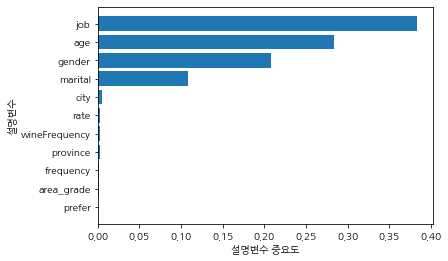

In [497]:
df_importance = pd.DataFrame()
df_importance['Feature'] = v_feature_name
df_importance['Importance'] = tree_GB.feature_importances_

df_importance.sort_values('Importance',ascending = True,inplace = True)
coordinates = range(len(df_importance))
plt.barh(y=coordinates,width = df_importance['Importance'])
plt.yticks(coordinates,df_importance['Feature'])
plt.xlabel('설명변수 중요도')
plt.ylabel('설명변수')

In [459]:
df_importance

,Feature,Importance
6,prefer,0.000764
10,area_grade,0.001073
7,frequency,0.001888
4,province,0.002329
8,wineFrequency,0.002612
9,rate,0.002722
5,city,0.005711
3,marital,0.107797
0,gender,0.208519
1,age,0.283925


### decesion tree와 random forest를 통해 알아낸 변수 중요도
- 중요변수 : job, age,gender, marital

### 모델링 (gradient boosting)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib

from sklearn.tree import export_graphviz
import graphviz

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix

In [2]:
wine_preference = pd.read_csv('wine_preference.csv',encoding = 'cp949')
wine_side = pd.read_csv('wine_side.csv',encoding = 'cp949')
wine_frequency = pd.read_csv('wine_frequency.csv',encoding = 'cp949')
wine_area_grade = pd.read_csv('wine_area_grade.csv',encoding = 'cp949')

In [3]:
wine_preference['seq'] = [i for i in range(1,10001)]

test = pd.merge(wine_side,wine_preference,on = 'seq')
wine_preference = pd.merge(test,wine_frequency,on = 'seq')
test = test[['seq', 'gender', 'age', 'job', 'marital', 'province',
       'city', 'side', 'choice', 'choice1']]
wine_preference = pd.merge(test,wine_frequency,on = 'seq')
wine_preference['rate'] = wine_preference['wineFrequency']/wine_preference['frequency']

cities = ['청주시', '화성시', '사하구', '양천구', '강남구', '광양시', '강북구', '포천시', '안양시',
       '마포구', '함안군', '해운대구', '구례군', '기장군', '포항시 북구', '천안시', '강동구',
       '포항시 남구']
provinces = ['충청도','경기도','부산시','서울시','서울시','전라도','서울시','경기도','경기도','서울시','경상도','부산시','전라도','부산시','경상도','충청도','서울시','경상도']

for i in range(18):
    wine_preference[(wine_preference['province'].isnull()) & (wine_preference['city']==cities[i])] = wine_preference[(wine_preference['province'].isnull()) & (wine_preference['city']==cities[i])].fillna(provinces[i])


wine_preference['gender'] = wine_preference['gender'].replace('UNKNOW','UNKNOWN')
wine_preference['gender'] = wine_preference['gender'].fillna('UNKNOWN')
wine_preference['marital'] = wine_preference['marital'].fillna('UNKNOWN')

choices = ['E', 'C', 'D', 'B', 'H', 'A', 'G', 'F']
sides = ['Ricotta','Gorgonzola','Roquefort','Brie','Annon','Camenbert','Valencay','Cheddar']

for i in range(len(choices)):
    wine_preference[(wine_preference['side'].isnull())&(wine_preference['choice']==choices[i])] = wine_preference[(wine_preference['side'].isnull())&(wine_preference['choice']==choices[i])].fillna(sides[i])
    
wine_preference['rate'] = wine_preference['wineFrequency']/wine_preference['frequency']    

import ast

wine_area_grade['Cities'] = wine_area_grade['Cities'].apply(ast.literal_eval)

result = []
for i in range(10000):
    if wine_preference['city'][i] in wine_area_grade['Cities'][0]:
        result.append('1급지')
    elif wine_preference['city'][i] in wine_area_grade['Cities'][1]:
        result.append('2급지')
    elif wine_preference['city'][i] in wine_area_grade['Cities'][2]:
        result.append('3급지')
    elif wine_preference['city'][i] in wine_area_grade['Cities'][3]:
        result.append('4급지')
    else:
        result.append('5급지')

wine_preference['area_grade'] = result

for i in range(len(wine_preference)):
    if wine_preference['rate'][i] > 1:
        tmp = wine_preference['frequency'][i]
        wine_preference['frequency'][i] = wine_preference['wineFrequency'][i]
        wine_preference['wineFrequency'][i] = tmp

wine_preference['rate'] = wine_preference['wineFrequency']/wine_preference['frequency']
wine_preference['rate'] = wine_preference['rate'].fillna(0)

/home/pirl/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:53: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/home/pirl/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:54: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [4]:
df_raw = wine_preference

df_raw = df_raw.drop(['seq', 'province', 'city', 'side', 'choice1', 'prefer', 'frequency', 'wineFrequency', 'rate','area_grade'],axis = 1)

columns_list = ['gender', 'age', 'job', 'marital', 'choice']

for j in columns_list:
    test_list = sorted(df_raw[j].unique())

    for i in range(len(test_list)):
        df_raw[j] = df_raw[j].replace(test_list[i],i)

In [5]:
df_raw_x = df_raw.drop('choice',axis = 1,inplace = False)
df_raw_y = df_raw['choice']

In [6]:
df_train_x,df_test_x,df_train_y,df_test_y = train_test_split(df_raw_x,df_raw_y,test_size = 0.3,random_state = 1234)

In [7]:
tree_uncustomized = GradientBoostingClassifier(random_state = 1234)
tree_uncustomized.fit(df_train_x,df_train_y)

print(tree_uncustomized.score(df_train_x,df_train_y))
print(tree_uncustomized.score(df_test_x,df_test_y))

0.7354285714285714
0.7183333333333334


### Parameter조정

In [11]:
train_accuracy = [];test_accuracy = []
para_lr = [n_tree*0.1 for n_tree in range(1,10)]

for v_learning_rate in para_lr:
    gb = GradientBoostingClassifier(learning_rate=v_learning_rate,random_state = 1234)
    gb.fit(df_train_x,df_train_y)
    train_accuracy.append(gb.score(df_train_x,df_train_y))
    test_accuracy.append(gb.score(df_test_x,df_test_y))
    
df_accuracy_lr = pd.DataFrame()
df_accuracy_lr['LearningRate'] = para_lr
df_accuracy_lr['TrainAccuracy'] = train_accuracy
df_accuracy_lr['TestAccuracy'] = test_accuracy
df_accuracy_lr['train-test'] = df_accuracy_lr['TrainAccuracy']-df_accuracy_lr['TestAccuracy']

In [15]:
df_accuracy_lr.round(5)

,LearningRate,TrainAccuracy,TestAccuracy,train-test
0,0.1,0.73543,0.71833,0.01710
1,0.2,0.73971,0.72000,0.01971
2,0.3,0.74129,0.72167,0.01962
3,0.4,0.74157,0.72133,0.02024
4,0.5,0.74114,0.72100,0.02014
5,0.6,0.74186,0.72067,0.02119
6,0.7,0.74200,0.71967,0.02233
7,0.8,0.69657,0.67367,0.02290
8,0.9,0.72586,0.70300,0.02286


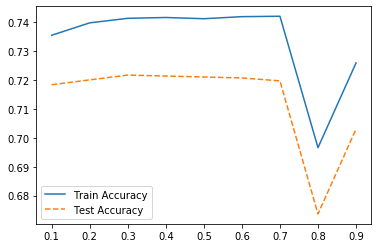

In [13]:
plt.plot(para_lr,train_accuracy,linestyle = '-',label = 'Train Accuracy')
plt.plot(para_lr,test_accuracy,linestyle = '--',label = 'Test Accuracy')
plt.legend()

### Learning rate:0.3

In [16]:
train_accuracy = [];test_accuracy = []
para_n_tree = [n_tree*10 for n_tree in range(1,16)]

for v_n_estimators in para_n_tree:
    gb = GradientBoostingClassifier(learning_rate = 0.3,n_estimators=v_n_estimators,random_state = 1234)
    gb.fit(df_train_x,df_train_y)
    train_accuracy.append(gb.score(df_train_x,df_train_y))
    test_accuracy.append(gb.score(df_test_x,df_test_y))
    
df_accuracy_n = pd.DataFrame()
df_accuracy_n['n_estimators'] = para_n_tree
df_accuracy_n['TrainAccuracy'] = train_accuracy
df_accuracy_n['TestAccuracy'] = test_accuracy
df_accuracy_n['train-test'] = df_accuracy_n['TrainAccuracy']-df_accuracy_n['TestAccuracy']

In [17]:
df_accuracy_n.round(5)

,n_estimators,TrainAccuracy,TestAccuracy,train-test
0,10,0.68829,0.67300,0.01529
1,20,0.71714,0.70367,0.01348
2,30,0.73786,0.71967,0.01819
3,40,0.73857,0.72167,0.01690
4,50,0.73871,0.72033,0.01838
5,60,0.73886,0.72033,0.01852
6,70,0.74071,0.72033,0.02038
7,80,0.74043,0.72133,0.01910
8,90,0.74129,0.72167,0.01962
9,100,0.74129,0.72167,0.01962


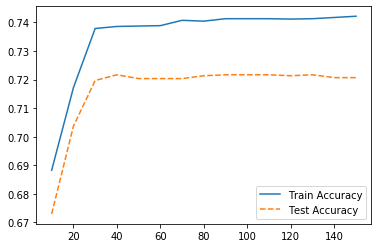

In [18]:
plt.plot(para_n_tree,train_accuracy,linestyle = '-',label = 'Train Accuracy')
plt.plot(para_n_tree,test_accuracy,linestyle = '--',label = 'Test Accuracy')
plt.legend()

### n_estimators : 90개 선택

In [19]:
train_accuracy = [];test_accuracy = []
para_depth = [depth for depth in range(1,11)]

for v_max_depth in para_depth:
    gb = GradientBoostingClassifier(learning_rate = 0.3,n_estimators = 90,max_depth=v_max_depth,random_state = 1234)
    gb.fit(df_train_x,df_train_y)
    train_accuracy.append(gb.score(df_train_x,df_train_y))
    test_accuracy.append(gb.score(df_test_x,df_test_y))
    
df_accuracy_depth = pd.DataFrame()
df_accuracy_depth['Depth'] = para_depth
df_accuracy_depth['TrainAccuracy'] = train_accuracy
df_accuracy_depth['TestAccuracy'] = test_accuracy

In [20]:
df_accuracy_depth.round(5)

,Depth,TrainAccuracy,TestAccuracy
0,1,0.57329,0.56700
1,2,0.71043,0.69367
2,3,0.74129,0.72167
3,4,0.74214,0.72033
4,5,0.74300,0.72100
5,6,0.74300,0.72167
6,7,0.74300,0.72100
7,8,0.74300,0.72167
8,9,0.74300,0.72067
9,10,0.74300,0.72233


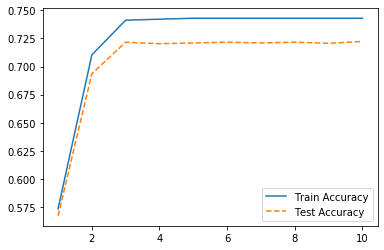

In [22]:
plt.plot(para_depth,train_accuracy,linestyle = '-',label = 'Train Accuracy')
plt.plot(para_depth,test_accuracy,linestyle = '--',label = 'Test Accuracy')
plt.legend()

### depth : 6

In [23]:
train_accuracy = [];test_accuracy = []
para_split = [n_split*10 for n_split in range(1,11)]

for v_para_split in para_split:
    gb = GradientBoostingClassifier(learning_rate = 0.3,n_estimators = 90,min_samples_split = v_para_split,max_depth=6,random_state = 1234)
    gb.fit(df_train_x,df_train_y)
    train_accuracy.append(gb.score(df_train_x,df_train_y))
    test_accuracy.append(gb.score(df_test_x,df_test_y))
    
df_accuracy_split = pd.DataFrame()
df_accuracy_split['Split'] = para_split
df_accuracy_split['TrainAccuracy'] = train_accuracy
df_accuracy_split['TestAccuracy'] = test_accuracy

In [24]:
df_accuracy_split.round(5)

,Split,TrainAccuracy,TestAccuracy
0,10,0.743,0.72167
1,20,0.743,0.72133
2,30,0.743,0.72133
3,40,0.743,0.72100
4,50,0.743,0.72133
5,60,0.743,0.72133
6,70,0.743,0.72100
7,80,0.743,0.72167
8,90,0.743,0.72100
9,100,0.743,0.72133


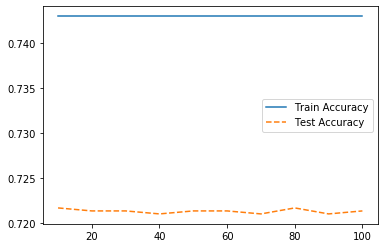

In [25]:
plt.plot(para_split,train_accuracy,linestyle = '-',label = 'Train Accuracy')
plt.plot(para_split,test_accuracy,linestyle = '--',label = 'Test Accuracy')
plt.legend()

### min_split : 80

In [30]:
train_accuracy = [];test_accuracy = []
para_leaf = [n_leaf*1 for n_leaf in range(1,11)]

for v_para_leaf in para_leaf:
    gb = GradientBoostingClassifier(learning_rate = 0.3,n_estimators = 90,min_samples_leaf = v_para_leaf,min_samples_split = 80,max_depth=6,random_state = 1234)
    gb.fit(df_train_x,df_train_y)
    train_accuracy.append(gb.score(df_train_x,df_train_y))
    test_accuracy.append(gb.score(df_test_x,df_test_y))
    
df_accuracy_leaf = pd.DataFrame()
df_accuracy_leaf['Leaf'] = para_leaf
df_accuracy_leaf['TrainAccuracy'] = train_accuracy
df_accuracy_leaf['TestAccuracy'] = test_accuracy

In [31]:
df_accuracy_leaf.round(3)

,Leaf,TrainAccuracy,TestAccuracy
0,1,0.743,0.722
1,2,0.743,0.722
2,3,0.743,0.722
3,4,0.743,0.721
4,5,0.743,0.722
5,6,0.742,0.722
6,7,0.742,0.722
7,8,0.742,0.722
8,9,0.742,0.722
9,10,0.742,0.722


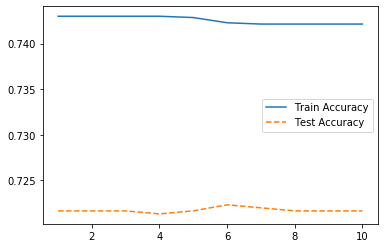

In [32]:
plt.plot(para_leaf,train_accuracy,linestyle = '-',label = 'Train Accuracy')
plt.plot(para_leaf,test_accuracy,linestyle = '--',label = 'Test Accuracy')
plt.legend()

### leaf : 5

In [33]:
gb_final = GradientBoostingClassifier(learning_rate = 0.3,n_estimators = 90,max_depth=6,min_samples_split=80,min_samples_leaf=5,random_state=1234)
gb_final.fit(df_train_x,df_train_y)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
                           learning_rate=0.3, loss='deviance', max_depth=6,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=5, min_samples_split=80,
                           min_weight_fraction_leaf=0.0, n_estimators=90,
                           n_iter_no_change=None, presort='auto',
                           random_state=1234, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

In [34]:
v_feature_name = df_train_x.columns

In [35]:
y_pred = gb_final.predict(df_test_x)

print(gb_final.score(df_train_x,df_train_y))
print(gb_final.score(df_test_x,df_test_y))
print(confusion_matrix(df_test_y,y_pred))

0.7428571428571429
0.7216666666666667
[[262  15   9   8  11   7  15  15]
 [  8 247   8  10   8  10  26   7]
 [ 13  13 194  15  15   5  18  15]
 [ 24  22  29 406  26   8  22  31]
 [ 14  23  10  31 282   9  25  18]
 [  6   8  15  26  15 126  15   9]
 [  4  24   7  10  10   7 446  17]
 [ 11   9  20  35  11   6  27 202]]


Text(0, 0.5, '설명변수')

/home/pirl/anaconda3/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 49444 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/home/pirl/anaconda3/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 47749 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/home/pirl/anaconda3/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 48320 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/home/pirl/anaconda3/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 49688 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/home/pirl/anaconda3/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 51473 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/home/pirl/anaconda3/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:211: Runtim

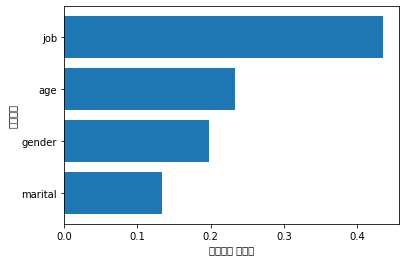

In [36]:
df_importance = pd.DataFrame()
df_importance['Feature'] = v_feature_name
df_importance['Importance'] = gb_final.feature_importances_

df_importance.sort_values('Importance',ascending = True,inplace = True)
coordinates = range(len(df_importance))
plt.barh(y=coordinates,width = df_importance['Importance'])
plt.yticks(coordinates,df_importance['Feature'])
plt.xlabel('설명변수 중요도')
plt.ylabel('설명변수')

In [42]:
df_importance

,Feature,Importance
3,marital,0.133679
0,gender,0.198558
1,age,0.233029
2,job,0.434734


In [43]:
wine_preference.head()

,seq,gender,age,job,marital,province,city,side,choice,choice1,prefer,frequency,wineFrequency,rate,area_grade
0,1,MALE,40대,자영업,MARREID,부산시,기장군,Ricotta,E,E,견고함,2,1,0.500000,1급지
1,2,FEMALE,20대,자영업,SINGLE,충청도,천안시,Ricotta,E,E,깊이감,3,1,0.333333,4급지
2,3,MALE,40대,임시직,MARREID,서울시,강남구,Camenbert,C,B,깊이감,3,2,0.666667,1급지
3,4,FEMALE,50대,벤처직원,MARREID,경상도,거제시,Roquefort,D,D,깊이감,2,1,0.500000,5급지
4,5,MALE,30대,교수,MARREID,경기도,포천시,Cheddar,E,E,깊이감,3,2,0.666667,2급지


In [45]:
import seaborn as sns

In [47]:
matplotlib.rc('font',family = 'NanumGothic')

[]

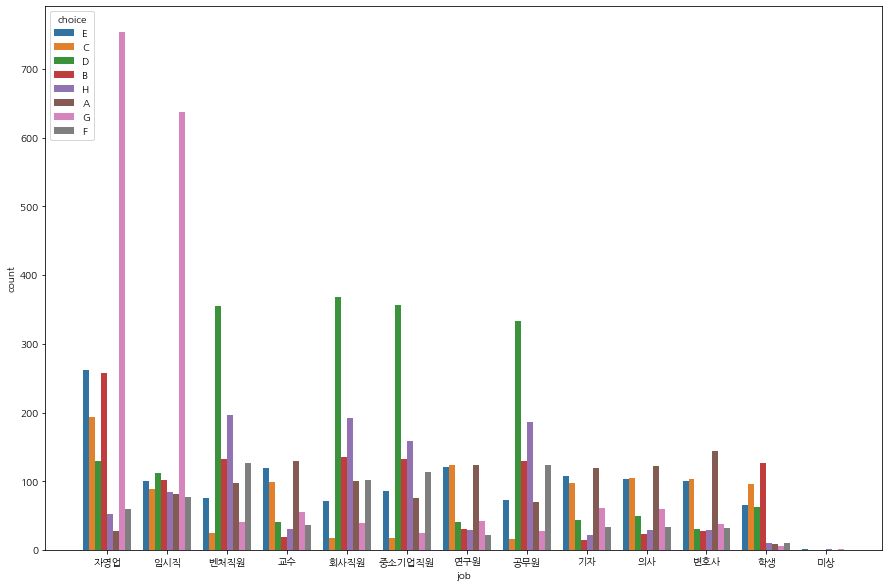

In [48]:
plt.figure(figsize = (15,10))
sns.countplot('job',hue = 'choice',data = wine_preference)
plt.plot()

In [59]:
wine_data_group

,그룹,당도,알콜 농도,과일향,오크향,깊이,견고함
0,A,M,H,M,H,H,H
1,B,H,L,H,M,L,M
2,C,H,L,H,M,M,M
3,D,H,H,H,M,L,L
4,E,H,H,M,M,M,L
5,F,M,H,M,M,M,H
6,G,L,H,H,H,M,M
7,H,M,H,M,M,H,H


In [49]:
A:35
B:10
C:15
D:25
E:15
F:20
G:30
H:10

### 연관분석
- 와인별로 어울리는 치즈를 분석하여 추천

In [1]:
import pandas as pd
import numpy as np
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules

In [107]:
import pandas as pd
import numpy as np
import seaborn as sns
import ast
import matplotlib
import matplotlib.pyplot as plt

In [108]:
wine_preference = pd.read_csv('wine_preference.csv',encoding = 'cp949')
wine_side = pd.read_csv('wine_side.csv',encoding = 'cp949')
wine_frequency = pd.read_csv('wine_frequency.csv',encoding = 'cp949')
wine_area_grade = pd.read_csv('wine_area_grade.csv',encoding = 'cp949')

In [109]:
wine_preference['seq'] = [i for i in range(1,10001)]

test = pd.merge(wine_side,wine_preference,on = 'seq')
wine_preference = pd.merge(test,wine_frequency,on = 'seq')
test = test[['seq', 'gender', 'age', 'job', 'marital', 'province',
       'city', 'side', 'choice', 'choice1']]
wine_preference = pd.merge(test,wine_frequency,on = 'seq')
wine_preference['rate'] = wine_preference['wineFrequency']/wine_preference['frequency']

cities = ['청주시', '화성시', '사하구', '양천구', '강남구', '광양시', '강북구', '포천시', '안양시',
       '마포구', '함안군', '해운대구', '구례군', '기장군', '포항시 북구', '천안시', '강동구',
       '포항시 남구']
provinces = ['충청도','경기도','부산시','서울시','서울시','전라도','서울시','경기도','경기도','서울시','경상도','부산시','전라도','부산시','경상도','충청도','서울시','경상도']

for i in range(18):
    wine_preference[(wine_preference['province'].isnull()) & (wine_preference['city']==cities[i])] = wine_preference[(wine_preference['province'].isnull()) & (wine_preference['city']==cities[i])].fillna(provinces[i])


wine_preference['gender'] = wine_preference['gender'].replace('UNKNOW','UNKNOWN')
wine_preference['gender'] = wine_preference['gender'].fillna('UNKNOWN')
wine_preference['marital'] = wine_preference['marital'].fillna('UNKNOWN')

choices = ['E', 'C', 'D', 'B', 'H', 'A', 'G', 'F']
sides = ['Ricotta','Gorgonzola','Roquefort','Brie','Annon','Camenbert','Valencay','Cheddar']

for i in range(len(choices)):
    wine_preference[(wine_preference['side'].isnull())&(wine_preference['choice']==choices[i])] = wine_preference[(wine_preference['side'].isnull())&(wine_preference['choice']==choices[i])].fillna(sides[i])
    
wine_preference['rate'] = wine_preference['wineFrequency']/wine_preference['frequency']    

import ast

wine_area_grade['Cities'] = wine_area_grade['Cities'].apply(ast.literal_eval)

result = []
for i in range(10000):
    if wine_preference['city'][i] in wine_area_grade['Cities'][0]:
        result.append('1급지')
    elif wine_preference['city'][i] in wine_area_grade['Cities'][1]:
        result.append('2급지')
    elif wine_preference['city'][i] in wine_area_grade['Cities'][2]:
        result.append('3급지')
    elif wine_preference['city'][i] in wine_area_grade['Cities'][3]:
        result.append('4급지')
    else:
        result.append('5급지')

wine_preference['area_grade'] = result

In [110]:
for i in range(len(wine_preference)):
    if wine_preference['rate'][i] > 1:
        tmp = wine_preference['frequency'][i]
        wine_preference['frequency'][i] = wine_preference['wineFrequency'][i]
        wine_preference['wineFrequency'][i] = tmp

wine_preference['rate'] = wine_preference['wineFrequency']/wine_preference['frequency']
wine_preference['rate'] = wine_preference['rate'].fillna(0)

/home/pirl/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.
/home/pirl/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """


In [8]:
result = []
for i in range(len(wine_preference)):
    first = []
    first.append(wine_preference['side'][i])
    first.append(wine_preference['choice1'][i])
    result.append(first)

In [11]:
enc = TransactionEncoder()
df_raw_enc = enc.fit_transform(X=result)
df_asso = pd.DataFrame(df_raw_enc,columns = enc.columns_)
df_asso.head()

,A,Annon,B,Brie,C,Camenbert,Cheddar,D,E,F,G,Gorgonzola,H,Ricotta,Roquefort,Valencay
0,False,False,False,False,False,False,False,False,True,False,False,False,False,True,False,False
1,False,False,False,False,False,False,False,False,True,False,False,False,False,True,False,False
2,False,False,True,False,False,True,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,True,False,False,False,False,False,False,True,False
4,False,False,False,False,False,False,True,False,True,False,False,False,False,False,False,False


In [19]:
min_support = 0.5

df_freq = apriori(df_asso,min_support=0.01,use_colnames=True)
df_freq.round(3).sort_values(by = 'support',ascending = False)

,support,itemsets
10,0.178,(G)
8,0.164,(E)
14,0.163,(Roquefort)
7,0.157,(D)
15,0.151,(Valencay)
13,0.126,(Ricotta)
3,0.119,(Brie)
1,0.116,(Annon)
5,0.114,(Camenbert)
11,0.114,(Gorgonzola)


In [17]:
df_asso_rule = association_rules(df_freq,metric='confidence',min_threshold=0.01)
df_asso_rule.round(3)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(A),(Annon),0.094,0.116,0.025,0.267,2.305,0.014,1.206
1,(Annon),(A),0.116,0.094,0.025,0.218,2.305,0.014,1.158
2,(A),(Camenbert),0.094,0.114,0.028,0.297,2.606,0.017,1.261
3,(Camenbert),(A),0.114,0.094,0.028,0.246,2.606,0.017,1.201
4,(A),(Cheddar),0.094,0.098,0.018,0.195,1.993,0.009,1.120
5,(Cheddar),(A),0.098,0.094,0.018,0.188,1.993,0.009,1.116
6,(Annon),(F),0.116,0.094,0.025,0.215,2.287,0.014,1.154
7,(F),(Annon),0.094,0.116,0.025,0.265,2.287,0.014,1.202
8,(Annon),(H),0.116,0.100,0.026,0.226,2.251,0.015,1.162
9,(H),(Annon),0.100,0.116,0.026,0.260,2.251,0.015,1.196


#### 위의 분석을 통해 각 와인별로 선호하는 치즈를 분석할 수 있음

### 고객군별 선호도 비율확인해보기

In [6]:
wine_preference = pd.read_csv('wine_preference.csv',encoding = 'cp949')
wine_side = pd.read_csv('wine_side.csv',encoding = 'cp949')
wine_frequency = pd.read_csv('wine_frequency.csv',encoding = 'cp949')
wine_area_grade = pd.read_csv('wine_area_grade.csv',encoding = 'cp949')

In [7]:
wine_preference['seq'] = [i for i in range(1,10001)]

test = pd.merge(wine_side,wine_preference,on = 'seq')
wine_preference = pd.merge(test,wine_frequency,on = 'seq')
test = test[['seq', 'gender', 'age', 'job', 'marital', 'province',
       'city', 'side', 'choice', 'choice1']]
wine_preference = pd.merge(test,wine_frequency,on = 'seq')
wine_preference['rate'] = wine_preference['wineFrequency']/wine_preference['frequency']

cities = ['청주시', '화성시', '사하구', '양천구', '강남구', '광양시', '강북구', '포천시', '안양시',
       '마포구', '함안군', '해운대구', '구례군', '기장군', '포항시 북구', '천안시', '강동구',
       '포항시 남구']
provinces = ['충청도','경기도','부산시','서울시','서울시','전라도','서울시','경기도','경기도','서울시','경상도','부산시','전라도','부산시','경상도','충청도','서울시','경상도']

for i in range(18):
    wine_preference[(wine_preference['province'].isnull()) & (wine_preference['city']==cities[i])] = wine_preference[(wine_preference['province'].isnull()) & (wine_preference['city']==cities[i])].fillna(provinces[i])


wine_preference['gender'] = wine_preference['gender'].replace('UNKNOW','UNKNOWN')
wine_preference['gender'] = wine_preference['gender'].fillna('UNKNOWN')
wine_preference['marital'] = wine_preference['marital'].fillna('UNKNOWN')

choices = ['E', 'C', 'D', 'B', 'H', 'A', 'G', 'F']
sides = ['Ricotta','Gorgonzola','Roquefort','Brie','Annon','Camenbert','Valencay','Cheddar']

for i in range(len(choices)):
    wine_preference[(wine_preference['side'].isnull())&(wine_preference['choice']==choices[i])] = wine_preference[(wine_preference['side'].isnull())&(wine_preference['choice']==choices[i])].fillna(sides[i])
    
wine_preference['rate'] = wine_preference['wineFrequency']/wine_preference['frequency']    

import ast

wine_area_grade['Cities'] = wine_area_grade['Cities'].apply(ast.literal_eval)

result = []
for i in range(10000):
    if wine_preference['city'][i] in wine_area_grade['Cities'][0]:
        result.append('1급지')
    elif wine_preference['city'][i] in wine_area_grade['Cities'][1]:
        result.append('2급지')
    elif wine_preference['city'][i] in wine_area_grade['Cities'][2]:
        result.append('3급지')
    elif wine_preference['city'][i] in wine_area_grade['Cities'][3]:
        result.append('4급지')
    else:
        result.append('5급지')

wine_preference['area_grade'] = result

In [8]:
for i in range(len(wine_preference)):
    if wine_preference['rate'][i] > 1:
        tmp = wine_preference['frequency'][i]
        wine_preference['frequency'][i] = wine_preference['wineFrequency'][i]
        wine_preference['wineFrequency'][i] = tmp

wine_preference['rate'] = wine_preference['wineFrequency']/wine_preference['frequency']
wine_preference['rate'] = wine_preference['rate'].fillna(0)

/home/pirl/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.
/home/pirl/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """


In [165]:
practice = wine_preference

In [166]:
practice.head()

,seq,gender,age,job,marital,province,city,side,choice,choice1,prefer,frequency,wineFrequency,rate,area_grade
0,1,MALE,40대,자영업,MARREID,부산시,기장군,Ricotta,E,E,견고함,2,1,0.500000,1급지
1,2,FEMALE,20대,자영업,SINGLE,충청도,천안시,Ricotta,E,E,깊이감,3,1,0.333333,4급지
2,3,MALE,40대,임시직,MARREID,서울시,강남구,Camenbert,C,B,깊이감,3,2,0.666667,1급지
3,4,FEMALE,50대,벤처직원,MARREID,경상도,거제시,Roquefort,D,D,깊이감,2,1,0.500000,5급지
4,5,MALE,30대,교수,MARREID,경기도,포천시,Cheddar,E,E,깊이감,3,2,0.666667,2급지


In [175]:
sp = ['변호사','의사','기자','연구원','교수']
bs = ['회사직원','중소기업직원','벤처직원']
etc = ['임시직','학생','공무원']

for i in range(len(practice)):
    if practice['job'][i] in sp:
        practice['job'] = practice['job'].replace(practice['job'][i],'전문직')

    elif practice['job'][i] in bs:
        practice['job'] = practice['job'].replace(practice['job'][i],'회사원')

    elif practice['job'][i] in etc:
        practice['job'] = practice['job'].replace(practice['job'][i],'임시직')

In [192]:
gender_list = ['MALE','FEMALE']
age_list = ['40대', '20대', '50대', '30대', '60대 이상']
job_list = ['자영업', '임시직', '회사원', '전문직']
marital_list = ['MARREID', 'SINGLE']
alpha = ['A','B','C','D','E','F','G','H']
result = []

for a in gender_list:
    for b in marital_list:
        for c in job_list:
            for d in age_list:
                for e in alpha:
                    result.append(len(practice[(practice['gender']==a)&(practice['marital']==b)&(practice['job']==c)&(practice['age']==d)&(practice['choice']==e)])/len(practice[(practice['gender']==a)&(practice['marital']==b)&(practice['job']==c)&(practice['age']==d)]))

### 고객군 별, 안주 별 선호 와인 추천을 위한 모델링

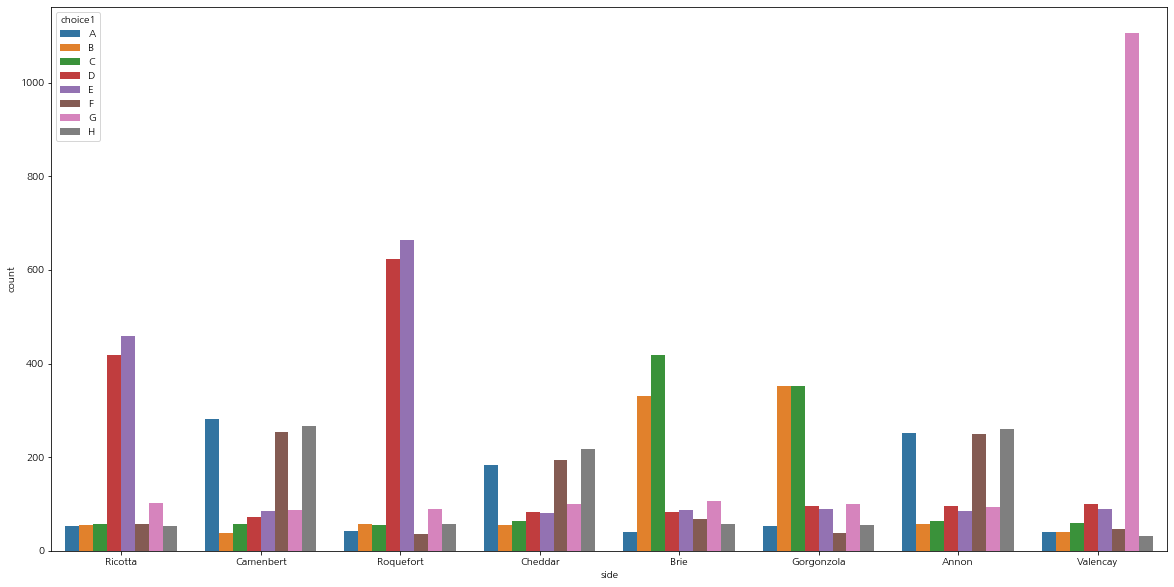

In [194]:
plt.figure(figsize=(20, 10))
plt.plot()
sns.countplot('side',hue = 'choice1',data = wine_preference,hue_order=['A','B','C','D','E','F','G','H'])

### 와인별로 치즈추천

In [3]:
wines = ['A','B','C']


def recommend_cheese(wines):
    side = str(input('side :'))
    if (side == 'Ricotta')or(side=='Roquefort'):
        cheese_wine = ['D','E']
    elif (side == 'Camenbert')or(side == 'Cheddar')or(side=='Annon'):
        cheese_wine = ['A','F','H']
    elif (side == 'Brie')or(side == 'Gorgonzola'):
        cheese_wine = ['B','C']
    else:
        cheese_wine = ['G']
        
    correct=[]
    incorrect = []
    for i in range(len(wines)):
        for j in cheese_wine:
            if wines[i]==j:
                correct.append(wines[i])
                cheese_wine.remove(wines[i])



    for a in correct:
        print(a)
    
        for wine in incorrect:
            print(wine)
    if len(cheese_wine)>0:
        print('안주와 어울리는 와인은 이것들입니다')
        for b in cheese_wine:
            print(b)

                
recommend_cheese(wines)

side :Ricotta
안주와 어울리는 와인은 이것들입니다
D
E
